In [525]:
import os

In [526]:
import pandas as pd

In [527]:
import numpy as np

In [528]:
import seaborn as sns

In [529]:
import matplotlib.pyplot as plt
%matplotlib inline

In [530]:
# pd.options.mode.chained_assignment = None

In [531]:
# from sklearn.linear_model import LogisticRegression

# Load data

In [532]:
pwd

'/home/ihor/anaconda_src/ks-challenge/src/main/resources/data'

In [533]:
cd "../resources/data/"

[Errno 2] No such file or directory: '../resources/data/'
/home/ihor/anaconda_src/ks-challenge/src/main/resources/data


In [534]:
#load dataset
tabular_data = pd.read_csv('tabular_data.csv')
#tabular_data.head(10)
print("******* train.csv report *******")
print('Shape: ', tabular_data.shape)
print('Shape w/o NaN: ', tabular_data.dropna(how='any').shape)
print('rows {:d}, unique ids: {:d}'.format(tabular_data.shape[0], tabular_data.id.nunique()))
print("NaNs in id or period:\n", tabular_data[{'id','period'}].isna().sum())
if tabular_data[{'id', 'period'}].shape[0] == tabular_data[{'id', 'period'}].drop_duplicates().shape[0]:
    print('No duplicates in id and/or period')
else:
    print('There are duplicates in id and/or period')

******* train.csv report *******
Shape:  (61272, 52)
Shape w/o NaN:  (21184, 52)
rows 61272, unique ids: 5106
NaNs in id or period:
 period    0
id        0
dtype: int64
No duplicates in id and/or period


In [535]:
tabular_data.columns

Index(['id', 'period', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43',
       'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_49'],
      dtype='object')

In [536]:
ids = ['id', 'period']

In [537]:
tabular_data

id  period  feature_0  feature_1  feature_2   feature_3  feature_4  \
0         0       1      110.0       55.0   0.432017    0.000000     176.78   
1         0       2      110.0      110.0   0.397517    0.000000     315.42   
2         0       3      110.0       55.0   0.359440    0.000000     354.55   
3         0       4      110.0       55.0   0.285707    0.000000     229.98   
4         0       5      110.0       55.0   0.101487  444.730391     307.12   
...     ...     ...        ...        ...        ...         ...        ...   
61267  5105       8      110.0       77.0        NaN    0.000000      95.30   
61268  5105       9      110.0       77.0        NaN    0.000000      61.87   
61269  5105      10      110.0      106.5        NaN    0.000000      88.05   
61270  5105      11      110.0       45.0        NaN    0.000000      98.40   
61271  5105      12      110.0       35.0        NaN    0.000000      30.70   

       feature_5  feature_6  feature_7  ...  feature_40  feature_41  \
0            0.0   0.323712        NaN  ...        0.00           0   
1            0.0   0.316798        NaN  ...        0.00           0   
2            0.0   0.339188        NaN  ...        0.07           0   
3            0.0   0.415428        NaN  ...        0.00           0   
4            0.0   0.569670        NaN  ...        0.95           0   
...          ...        ...        ...  ...         ...         ...   
61267        0.0   0.094381     221.85  ...       -0.00           0   
61268        0.0   0.105878     343.22  ...        1.75           0   
61269        0.0   0.040169     259.33  ...        8.27           0   
61270        0.0   0.040810     222.00  ...        0.00           0   
61271        0.0   0.042272     285.35  ...        0.00           0   

       feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0        0.000000         0.0        55.0         2.0    0.526552       145.0   
1        0.000000         0.0       110.0         1.0    0.481063       130.0   
2        0.000000         0.0        55.0         1.0    0.509598       180.0   
3        0.000000         0.0        55.0         0.0    0.680089       142.0   
4       20.014485         0.0        55.0         0.0    0.776175        85.0   
...           ...         ...         ...         ...         ...         ...   
61267    0.000000         0.0        75.0         0.0    0.082128        43.0   
61268    0.000000         0.0        75.0         0.0    0.077594        49.0   
61269    0.000000         0.0        99.0         1.0    0.109053        43.0   
61270    0.000000         0.0         0.0         0.0    0.101929        35.0   
61271    0.000000         0.0         0.0         0.0         NaN        35.0   

       feature_48  feature_49  
0          133.28         0.0  
1          229.97         0.0  
2          231.78         0.0  
3          183.83         0.0  
4          155.83         0.0  
...           ...         ...  
61267       83.97         0.0  
61268       48.02         0.0  
61269       74.52         0.0  
61270       25.83         0.0  
61271       29.03         0.0  

[61272 rows x 52 columns]

In [538]:
#load train data
train = pd.read_csv('train.csv')
train.head(10)

id  target
0   0       0
1   1       0
2   2       1
3   3       0
4   4       1
5   5       0
6   6       1
7   7       0
8   8       1
9   9       0

In [539]:
print("******* train.csv report *******")
print('rows {:d}, unique ids: {:d}, unique targets {:d}'.format(train.shape[0], train.id.nunique(), train.target.nunique()))
print('NaN count:')
print(train.isna().sum())
val_counts = train.target.value_counts()
print('Target value counts:\n', val_counts)
print('Class_1 probability = ', val_counts[1] / val_counts.sum())

******* train.csv report *******
rows 4084, unique ids: 4084, unique targets 2
NaN count:
id        0
target    0
dtype: int64
Target value counts:
 0    3009
1    1075
Name: target, dtype: int64
Class_1 probability =  0.26322233104799214


# Cleaning and formatting

### Sign correction

In [540]:
enable_sign_correction = True
features_to_correct = ['feature_8', 'feature_11', 'feature_23', 'feature_32', 'feature_34']

if enable_sign_correction:
    for feature in features_to_correct:
        tabular_data[feature] = tabular_data[feature].abs()

In [541]:
tabular_data['feature_33_div'] = 0.02 / tabular_data.feature_33
tabular_data['feature_10_minus_4'] = tabular_data.feature_10 - tabular_data.feature_4
tabular_data['feature_22_minus_20'] = tabular_data.feature_22 - tabular_data.feature_20 - tabular_data.feature_21
tabular_data['feature_22_minus_44'] = tabular_data.feature_22 - tabular_data.feature_44 - tabular_data.feature_21 
tabular_data['feature_1_minus_20'] = tabular_data.feature_22 - tabular_data.feature_44 - tabular_data.feature_21


### Delete rows with most of values absent

#### Heatmap of skipped values

Text(0.5, 1.0, 'Skipped value (yellow)')

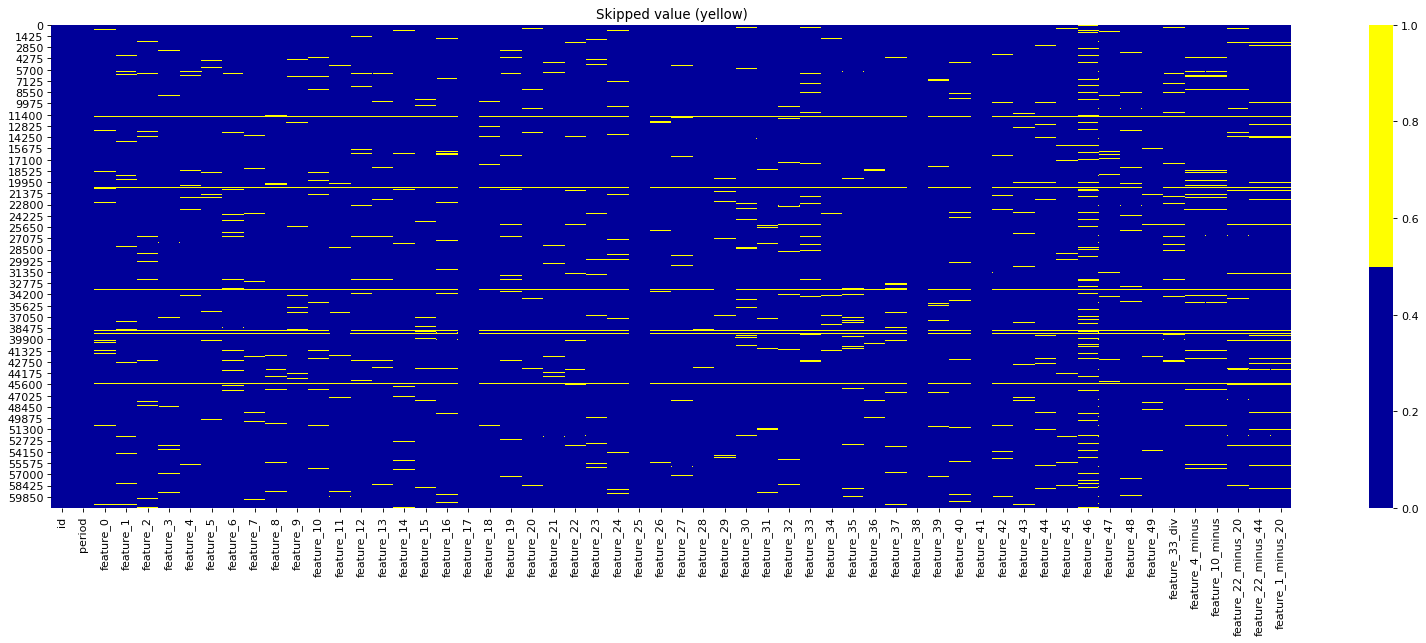

In [542]:
cols = tabular_data.columns #columns to display
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
plt.figure(num=None, figsize=(25, 8), dpi=80, facecolor='w', edgecolor='k')
colours = ['#000099', '#ffff00'] 
sns.heatmap(tabular_data[cols].isnull(), cmap=sns.color_palette(colours))
plt.title("Skipped value (yellow)")

#### Detect optimal margin of NaNs count

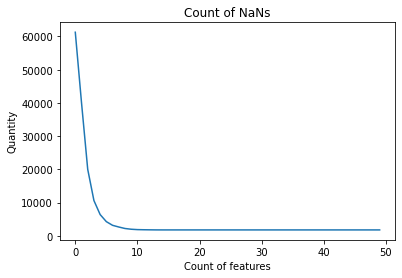

In [543]:
#there are some values with almost all features absent (except features 17, 25, 38, 41) 
#find distribution of NaN within row
#count of NaNs in each row
nans_count = tabular_data.isna().aggregate(func=sum, axis=1)

#distribution plot of NaNs quantity
nans_count_hist = pd.DataFrame({'features_count':range(0,50)})
nans_count_hist['nans_count'] = nans_count_hist.features_count.apply(lambda x: nans_count[nans_count >= x].count())
nans_count_hist['nans_count'].plot()

# Add labels
plt.title('Count of NaNs')
plt.xlabel('Count of features')
plt.ylabel('Quantity')
plt.show()

#### Delete rows over margin of NaNs count

In [544]:
nans_count_margin = 10
rows_to_delete = nans_count[nans_count >= 10].index
print("Rows to delete:\n", rows_to_delete)
print("Total rows before: ", tabular_data.shape[0])
tabular_data = tabular_data.drop(index=rows_to_delete, errors='ignore')
print("Total rows after: ", tabular_data.shape[0])

Rows to delete:
 Int64Index([   39,    40,    41,    42,    43,    44,    45,    46,    47,
              135,
            ...
            60704, 60705, 60706, 60707, 61014, 61015, 61016, 61017, 61018,
            61019],
           dtype='int64', length=1846)
Total rows before:  61272
Total rows after:  59426


### Encode object values (feature_25)

In [545]:
df_to_encode = tabular_data
print('Object features:')
features_to_encode = df_to_encode.dtypes[df_to_encode.dtypes == 'O'].drop(columns=ids).index
features_to_encode

Object features:


Index(['feature_25'], dtype='object')

In [546]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#NaN should be encoded as another value
encoded_data = df_to_encode
for feature in features_to_encode:
    encoded_data[feature + "_encoded"] = le.fit_transform(df_to_encode[feature].fillna('__NaN__'))
    print(feature + " has been encoded")
encoded_data = encoded_data.drop(columns=features_to_encode, errors='ignore')   
# encoded_data

feature_25 has been encoded


### Delete splashes

In [547]:
splashes_margin = 0.03
splashed_data = encoded_data

unsplashed_data = splashed_data[splashed_data.columns.drop(['id', 'period'])]
mean_std = pd.DataFrame({'mean':splashed_data.mean(), 
                         'std':splashed_data.std(),
                         'q_left':splashed_data.quantile(q=splashes_margin, interpolation='lower'),
                         'q_right':splashed_data.quantile(q=1-splashes_margin, interpolation='higher'),
                         'q_left_10':splashed_data.quantile(q=0.1, interpolation='lower'),
                         'q_right_10':splashed_data.quantile(q=1-0.1, interpolation='higher')
                         })
mean_std['m_left'] = mean_std['mean'] - 3*mean_std['std']
mean_std['m_right'] = mean_std['mean'] + 3*mean_std['std']

mean_std['mean_10'] = splashed_data[(splashed_data >= mean_std['q_left_10']) & (splashed_data <= mean_std['q_right_10'])].mean() 
mean_std['std_10'] = splashed_data[(splashed_data >= mean_std['q_left_10']) & (splashed_data <= mean_std['q_right_10'])].std() 

mean_std['ms_10_left'] = mean_std['mean_10'] - 3*mean_std['std_10']
mean_std['ms_10_right'] = mean_std['mean_10'] + 3*mean_std['std_10'] 

#cut splashes based on 3*sigma
# unsplashed_data = splashed_data[{'id', 'period'}] \
#     .join(unsplashed_data[ (unsplashed_data > mean_std['m_left']) & (unsplashed_data < mean_std['m_right']) ])

#cut splashes based on 3% lower/upper quantiles
# unsplashed_data = splashed_data[{'id', 'period'}] \
#     .join(unsplashed_data[ (unsplashed_data >= mean_std['q_left']) & (unsplashed_data <= mean_std['q_right']) ])

#cut splashes based on 3*sigma of central 80% values
unsplashed_data = splashed_data[{'id', 'period'}] \
    .join(unsplashed_data[ (unsplashed_data >= mean_std['ms_10_left']) & (unsplashed_data <= mean_std['ms_10_right']) ])

mean_std

# df = unsplashed_data['feature_5']
# q_left = df.quantile(q=0.1, interpolation='lower')
# q_right = df.quantile(q=0.9, interpolation='higher')
# m = df[ (df >= q_left) & (df <= q_right)].mean()
# s = df[ (df >= q_left) & (df <= q_right)].std()

# size_before = df.shape[0]
# size_q = df[ (df >= q_left) & (df <= q_right)].shape[0]
# size_ms = df[(df > m - 3*s ) & (df < m + 3*s)].shape[0]
# print(size_before, size_q, size_ms)
# print(df.max(), df[ (df >= q_left) & (df <= q_right)].max(), df[(df > m - 3*s ) & (df < m + 3*s)].max())

mean           std      q_left       q_right  \
id                   2555.002171   1475.415019  151.000000   4953.000000   
period                  6.432572      3.452809    1.000000     12.000000   
feature_0             110.070105      0.461269  110.000000    111.000000   
feature_1              87.145491     95.510884    0.000000    260.000000   
feature_2               0.302017      0.736269    0.008647      0.677779   
feature_3            2998.931830  11206.993978    0.000000  22136.633458   
feature_4             414.929301    524.405948    0.000000   1669.780000   
feature_5            1462.741643   7338.611289    0.000000  12872.733646   
feature_6               0.572962      0.728941    0.019190      0.998843   
feature_7             391.464478    436.428010    0.000000   1432.020000   
feature_8             138.860790    132.263431    1.000000    449.000000   
feature_9             111.601116    651.021200    0.000000    205.330000   
feature_10            389.017681    512.416158    0.000000   1621.330000   
feature_11            997.134072   6114.864279    0.000000    357.000000   
feature_12              0.287930      0.111645    0.085168      0.492779   
feature_13              0.050524      0.087228   -0.014718      0.265494   
feature_14              3.152743     24.539864    0.000000     20.000000   
feature_15             10.823613     14.114500    0.000000     31.000000   
feature_16            353.119024   2370.750629    0.000000     82.000000   
feature_17              0.499717      0.289257    0.032175      0.970544   
feature_18            417.802739    445.935363    0.370000   1474.080000   
feature_19              0.227263      0.111605    0.041296      0.415708   
feature_20             70.291049     60.756085    0.000000    200.000000   
feature_21             11.887122     54.725271    0.000000     80.000000   
feature_22            928.803387   5876.311627    0.000000    362.000000   
feature_23             31.110061     35.350211    0.000000    116.000000   
feature_24              3.094472     24.021455    0.000000     19.000000   
feature_26            100.455754    119.499967    0.000000    368.000000   
feature_27              4.868639     12.753770    0.000000     36.350000   
feature_28             20.654216     45.394537   -2.830000    125.620000   
feature_29           1804.341663  11798.727862    0.000000    395.000000   
feature_30            131.652368    150.052137    0.000000    472.000000   
feature_31           2961.974341   1721.700676  189.000000   5759.000000   
feature_32            148.834737    161.274882    0.000000    518.000000   
feature_33              0.231453      0.161399    0.016631      0.540475   
feature_34             96.635217     56.534288    6.000000    188.000000   
feature_35           1477.884847   8257.900621    0.000000  10139.687518   
feature_36            100.316919    147.123953    0.000000    457.830000   
feature_37              4.938301     25.537046    0.000000     60.000000   
feature_38              0.025663      0.128045    0.000000      0.417301   
feature_39              2.865934     28.320694    0.000000     17.720000   
feature_40              2.388538     12.298630   -0.030000     16.180000   
feature_41              0.000000      0.000000    0.000000      0.000000   
feature_42            450.617457   2782.410101    0.000000   3960.024688   
feature_43              1.091367      2.986605    0.000000      9.000000   
feature_44             70.068952     60.533820    0.000000    200.000000   
feature_45             12.624556     22.802428    0.000000     68.000000   
feature_46              0.420057      0.402671   -0.332691      0.982838   
feature_47            125.505718    124.014810    0.000000    416.000000   
feature_48            289.123062    381.161050    0.000000   1207.370000   
feature_49             61.007411    337.574428    0.000000    128.000000   
feature_33_div               inf           NaN    0.037004      1.202574   


In [548]:
def plot_test(input_data):
    for feature in ['feature_5', 'feature_11', 'feature_25_encoded']:

        plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    #     ax = plt.subplot(4, 1, i + 1)
        sns.distplot(input_data[feature], hist = True, kde = True,
                         kde_kws = {'linewidth': 3},
                         label = '!driver',
                         bins=min(input_data[feature].nunique(), 100))

        plt.legend(prop={'size': 16}, title = 'Target class')
        plt.title([feature])
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.show()

# # plot_test(unsplashed2_data)
# plot_test(unsplashed_data)
# plot_test(splashed_data)

### Delete nonsignificants columns

#### Make data report

In [549]:
nonsignifican_margin = 0.05

#TIME CONSUMING! (because of nunique)
#count uniques and check for data types
#NaN is not unique value!
#Look for object - it's categorial, so should be converted to dummies
input_data = unsplashed_data
tabular_data_report = pd.DataFrame({'dtypes':input_data.dtypes,
                                    'nunique':input_data.nunique(), 
                                    'nan_count':input_data.isna().sum(),
                                    'm_left':input_data.quantile(q= nonsignifican_margin, interpolation='lower'),
                                    'm2_left':input_data.quantile(q= 2*nonsignifican_margin, interpolation='lower'),
                                    'm2_right':input_data.quantile(q= 1 - 2*nonsignifican_margin, interpolation='higher'),                                    
                                    'm_right':input_data.quantile(q= 1 - nonsignifican_margin, interpolation='higher'),
                                    '5%':input_data.quantile(q=0.05),
                                    '10%':input_data.quantile(q=0.10),
                                    '90%':input_data.quantile(q=0.90),
                                    '95%':input_data.quantile(q=0.95)
                                   })
tabular_data_report = tabular_data_report.join(input_data.describe().transpose()) \
    .drop(['id', 'period'])
tabular_data_report

dtypes  nunique  nan_count      m_left     m2_left  \
feature_0            float64        1       2953  110.000000  110.000000   
feature_1            float64     8197       4671    0.000000    0.000000   
feature_2            float64    51692       5064    0.012613    0.023546   
feature_3            float64    25125       8659    0.000000    0.000000   
feature_4            float64    29820       5995    0.030000    1.930000   
feature_5            float64     3927       8768    0.000000    0.000000   
feature_6            float64    55236       2843    0.036682    0.086027   
feature_7            float64    30380       6030    1.920000   17.970000   
feature_8            float64      337       5334    3.000000   13.000000   
feature_9            float64     3316       8295    0.000000    0.000000   
feature_10           float64    28775       6218    0.000000    0.720000   
feature_11           float64     8183       5568    0.000000    0.000000   
feature_12           float64    53263       3409    0.111220    0.140748   
feature_13           float64    40346       8085    0.000226    0.001099   
feature_14           float64        3       9200    0.000000    0.000000   
feature_15           float64       58       1904    0.000000    0.000000   
feature_16           float64        6       8290    0.000000    0.000000   
feature_17           float64    59426          0    0.051872    0.100837   
feature_18           float64    31386       5931    4.500000   25.500000   
feature_19           float64    54686       1887    0.055068    0.079908   
feature_20           float64     5576       3726    0.000000    0.000000   
feature_21           float64     1601       8226    0.000000    0.000000   
feature_22           float64     8256       5448    0.000000    0.000000   
feature_23           float64       82       5885    0.000000    0.000000   
feature_24           float64        3       8804    0.000000    0.000000   
feature_26           float64      259       5444    0.000000    1.000000   
feature_27           float64      658       8726    0.000000    0.000000   
feature_28           float64     4191       8360    0.000000    0.000000   
feature_29           float64     3499       5094    0.000000    0.000000   
feature_30           float64      340       5492    0.000000    2.000000   
feature_31           float64     6596       1163  324.000000  654.000000   
feature_32           float64      377       5625    1.000000    5.000000   
feature_33           float64    54561       2554    0.022298    0.035546   
feature_34           float64      234       1132   10.000000   21.000000   
feature_35           float64    20871       8963    0.000000    0.000000   
feature_36           float64    12808       6700    0.000000    0.000000   
feature_37           float64        1       5910    0.000000    0.000000   
feature_38           float64        1       3057    0.000000    0.000000   
feature_39           float64        4       7311    0.000000    0.000000   
feature_40           float64      733       8825   -0.010000    0.000000   
feature_41             int64        1          0    0.000000    0.000000   
feature_42           float64    21635       9200    0.000000    0.000000   
feature_43           float64        3       8044    0.000000    0.000000   
feature_44           float64     5575       3587    0.000000    0.000000   
feature_45           float64       31       7737    0.000000    0.000000   
feature_46           float64    51620       7759    0.005613    0.021168   
feature_47           float64      311       5290    2.000000    9.000000   
feature_48           float64    25350       6073    0.000000    0.400000   
feature_49           float64       31       8157    0.000000    0.000000   
feature_33_div       float64    49182       8364    0.038700    0.042783   
feature_4_minus      float64    16292       8873    0.000000    0.000000   
feature_10_minus     float64    16292       8873  -44.670000  -34.3500

#### Find nonsignificant features (only single value inside margins)

In [550]:
print("Nonsignificant features:")
nonsignificants = tabular_data_report[ (tabular_data_report['nunique'] <= 1) |
                     (tabular_data_report.m_left == tabular_data_report.m_right) | 
                     (tabular_data_report['min'] == tabular_data_report.m2_right) | 
                     (tabular_data_report.m2_left == tabular_data_report['max']) ]
nonsignificants

Nonsignificant features:


dtypes  nunique  nan_count  m_left  m2_left  m2_right  \
feature_0   float64        1       2953   110.0    110.0     110.0   
feature_5   float64     3927       8768     0.0      0.0       0.0   
feature_37  float64        1       5910     0.0      0.0       0.0   
feature_38  float64        1       3057     0.0      0.0       0.0   
feature_39  float64        4       7311     0.0      0.0       0.0   
feature_41    int64        1          0     0.0      0.0       0.0   

               m_right     5%    10%    90%         95%    count        mean  \
feature_0   110.000000  110.0  110.0  110.0  110.000000  56473.0  110.000000   
feature_5    59.329015    0.0    0.0    0.0   59.289246  50658.0   20.518355   
feature_37    0.000000    0.0    0.0    0.0    0.000000  53516.0    0.000000   
feature_38    0.000000    0.0    0.0    0.0    0.000000  56369.0    0.000000   
feature_39    0.000000    0.0    0.0    0.0    0.000000  52115.0    0.000415   
feature_41    0.000000    0.0    0.0    0.0    0.000000  59426.0    0.000000   

                   std    min    25%    50%    75%         max  
feature_0     0.000000  110.0  110.0  110.0  110.0  110.000000  
feature_5   104.976243    0.0    0.0    0.0    0.0  955.170709  
feature_37    0.000000    0.0    0.0    0.0    0.0    0.000000  
feature_38    0.000000    0.0    0.0    0.0    0.0    0.000000  
feature_39    0.003242    0.0    0.0    0.0    0.0    0.050000  
feature_41    0.000000    0.0    0.0    0.0    0.0    0.000000

In [551]:
#delete nonsignificant: 
cleaned_data = input_data.drop(columns=nonsignificants.index, errors='ignore')
cleaned_data.columns

Index(['period', 'id', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_40', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_33_div', 'feature_4_minus', 'feature_10_minus',
       'feature_22_minus_20', 'feature_22_minus_44', 'feature_1_minus_20',
       'feature_25_encoded'],
      dtype='object')

In [552]:
#stub for export to Excel
#Excel requires ";" separator
#tabular_data_report.to_csv('tabular_data_report.csv', index=True)

### Merge with train data

In [553]:
#merge train data to dataset
targeted_data = pd.merge(cleaned_data, train, how='left', on='id')

### Combine correlated features

In [554]:
#calculate Pearson correlations
data_to_combine = targeted_data
data_corr = data_to_combine[data_to_combine.target.isna() != True].corr(method='pearson')

In [555]:
#print the most correlated pairs 
margin = 0.8
correlation_report = pd.DataFrame(columns=['column_a', 'column_b', 'column_a_index', 'column_b_index',
                                          'correlation', 'a_nans_count', 'b_nans_count', 'both_is_nan_count'])
for r in range(1, data_corr.shape[0]-1):
    for c in range(0, r-1):
        if (data_corr.iloc[r][c] > margin) or (data_corr.iloc[r][c] < -margin):
            print(data_corr.columns[c], "=", data_corr.columns[r], 
                  ' (columns {:d}:{:d}, correlation={:.3f})'.format(c, r, data_corr.iloc[r][c]))
            correlation_report = correlation_report.append({
                'column_a':data_corr.columns[c],
                'column_b':data_corr.columns[r],
                'column_a_index':c,
                'column_b_index':r,
                'correlation':data_corr.iloc[r][c],
#                 'both_is_nan_count':data_to_combine.iloc[:, r].isna().combine(data_to_combine.iloc[:, c].isna(), 
#                                                                      lambda s1, s2: s1 and s2).sum(),
                'a_nans_count':data_to_combine.iloc[:, c].isna().sum(),
                'b_nans_count':data_to_combine.iloc[:, r].isna().sum()
                }, ignore_index=True)
print("Completed")
#' both is NaN:', 

feature_4 = feature_10  (columns 5:10, correlation=0.988)
feature_1 = feature_11  (columns 2:11, correlation=0.978)
feature_7 = feature_18  (columns 7:18, correlation=0.986)
feature_2 = feature_19  (columns 3:19, correlation=0.813)
feature_1 = feature_20  (columns 2:20, correlation=0.888)
feature_11 = feature_20  (columns 11:20, correlation=0.916)
feature_1 = feature_22  (columns 2:22, correlation=1.000)
feature_11 = feature_22  (columns 11:22, correlation=0.977)
feature_20 = feature_22  (columns 20:22, correlation=0.883)
feature_23 = feature_26  (columns 23:25, correlation=0.819)
feature_23 = feature_30  (columns 23:29, correlation=0.882)
feature_26 = feature_30  (columns 25:29, correlation=0.988)
feature_23 = feature_32  (columns 23:31, correlation=0.860)
feature_26 = feature_32  (columns 25:31, correlation=0.965)
feature_30 = feature_32  (columns 29:31, correlation=0.976)
feature_2 = feature_33  (columns 3:32, correlation=-0.864)
feature_19 = feature_33  (columns 19:32, correlation=

In [556]:
correlation_report.sort_values(by='correlation')

column_a             column_b column_a_index column_b_index  \
32            feature_9     feature_10_minus              9             47   
16           feature_19           feature_33             19             32   
15            feature_2           feature_33              3             32   
30           feature_33       feature_33_div             32             45   
3             feature_2           feature_19              3             19   
9            feature_23           feature_26             23             25   
20           feature_14           feature_43             14             38   
35           feature_21   feature_1_minus_20             21             50   
34           feature_21  feature_22_minus_44             21             49   
33           feature_21  feature_22_minus_20             21             48   
18            feature_4           feature_36              5             35   
12           feature_23           feature_32             23             31   
19           feature_10           feature_36             10             35   
29            feature_2       feature_33_div              3             45   
10           feature_23           feature_30             23             29   
8            feature_20           feature_22             20             22   
25           feature_22           feature_44             22             39   
4             feature_1           feature_20              2             20   
22            feature_1           feature_44              2             39   
21           feature_16           feature_43             16             38   
5            feature_11           feature_20             11             20   
23           feature_11           feature_44             11             39   
31            feature_9      feature_4_minus              9             46   
13           feature_26           feature_32             25             31   
27            feature_4           feature_48              5             43   
14           feature_30           feature_32             29             31   
7            feature_11           feature_22             11             22   
1             feature_1           feature_11              2             11   
26            feature_8           feature_47              8             42   
28           feature_10           feature_48             10             43   
2             feature_7           feature_18              7             18   
11           feature_26           feature_30             25             29   
0             feature_4           feature_10              5             10   
17           feature_31           feature_34             30             33   
6             feature_1           feature_22              2             22   
24           feature_20           feature_44             20             39   
36  feature_22_minus_20   feature_1_minus_20             48             50   

    correlation a_nans_count b_nans_count  both_is_nan_count  
32    -0.921998         8295         8873                NaN  
16    -0.886547         1887         2554                NaN  
15    -0.863566         5064         2554                NaN  
30    -0.811347         2554         8364                NaN  
3      0.813089         5064         1887                NaN  
9      0.819094         5885         5444                NaN  
20     0.826271         9200         8044                NaN  
35     0.844351         8226         9603                NaN  
34     0.844351         8226         9603                NaN  
33     0.844830         8226         9651                NaN  
18     0.853487         5995         6700                NaN  
12     0.859708         5885         5625                NaN  
19     0.867043         6218         6700                NaN  
29     0.877299         5064         8364                NaN  
10     0.882398         5885         5492                NaN  
8      0.882870         3726         5448 

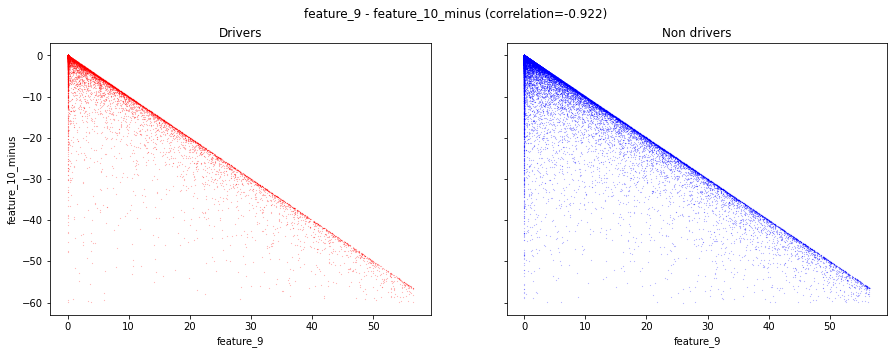

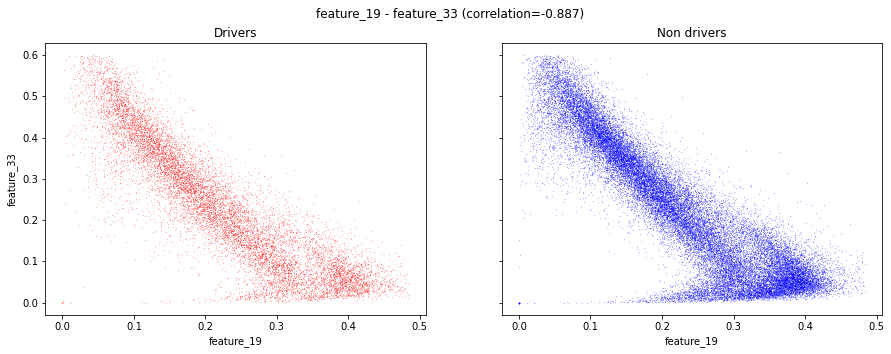

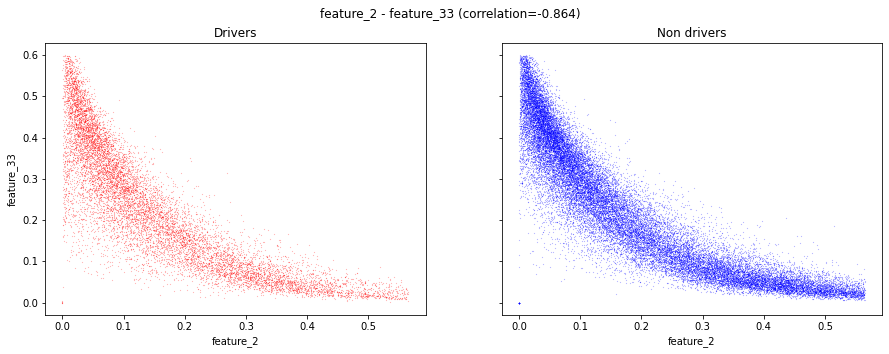

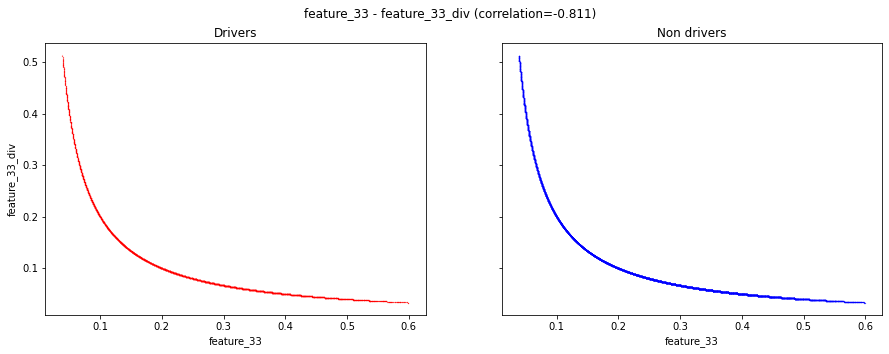

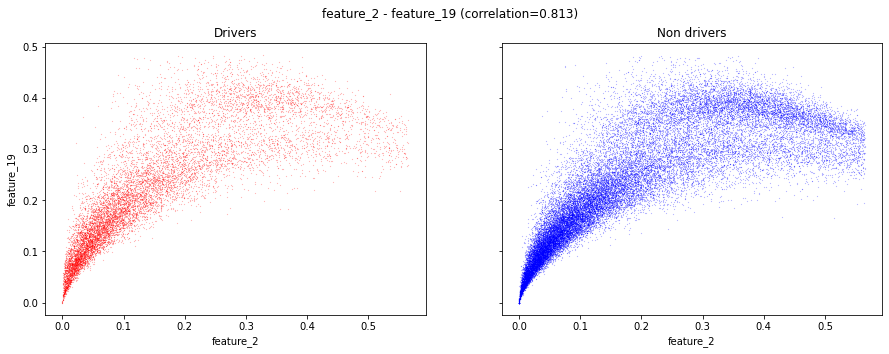

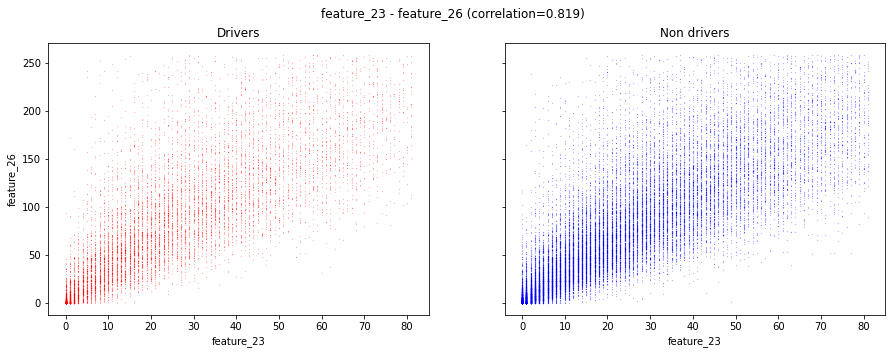

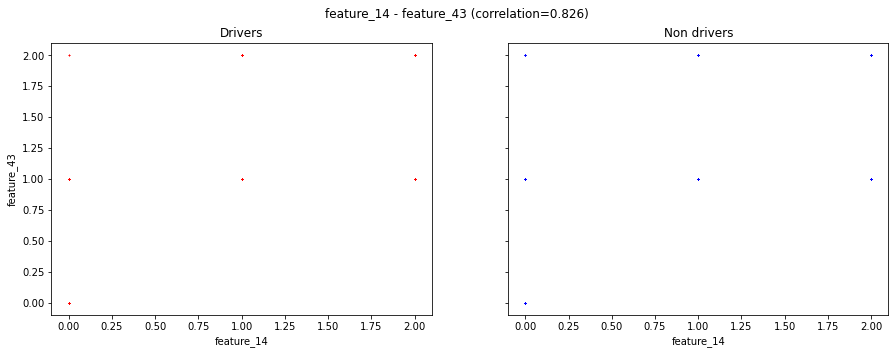

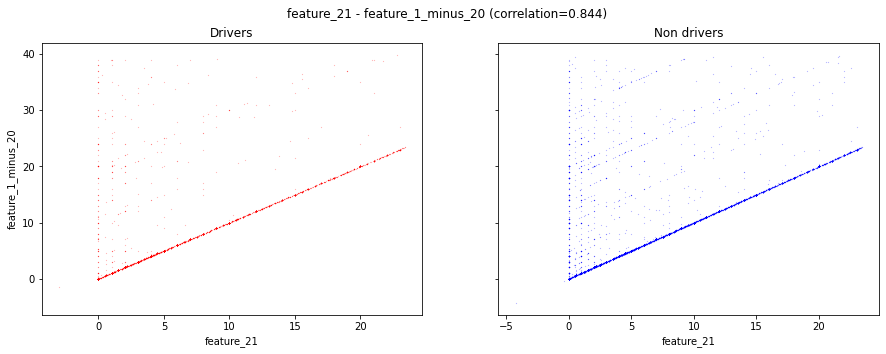

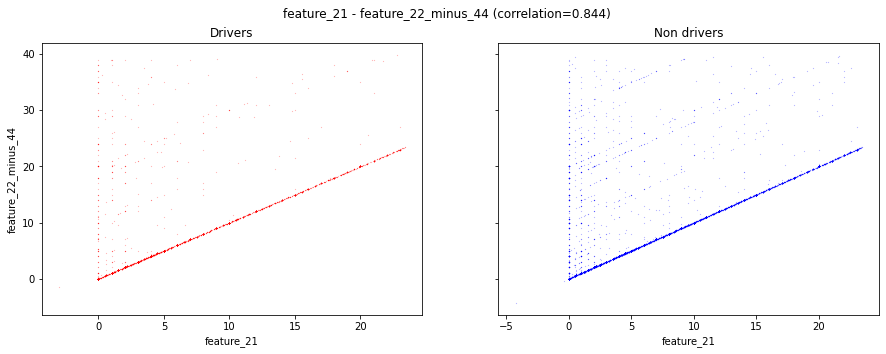

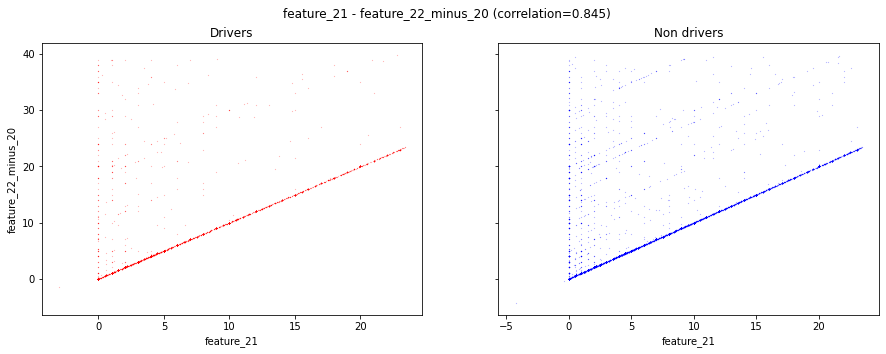

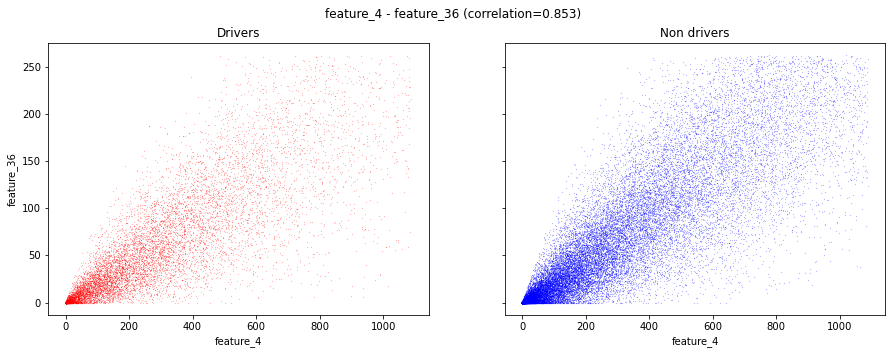

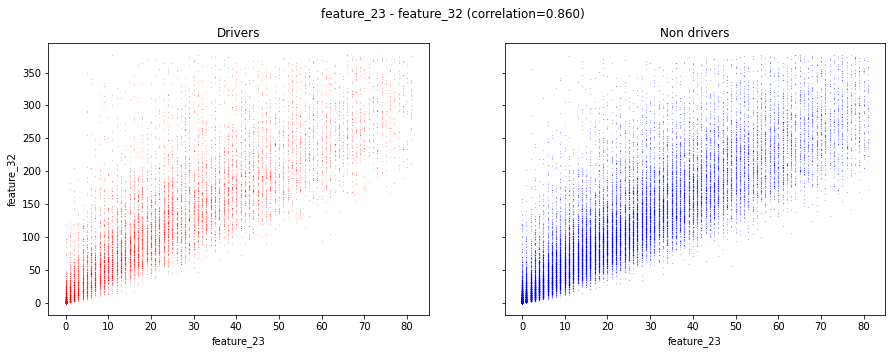

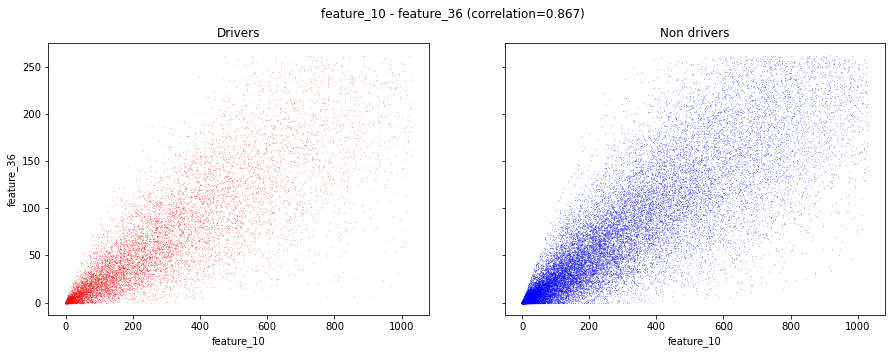

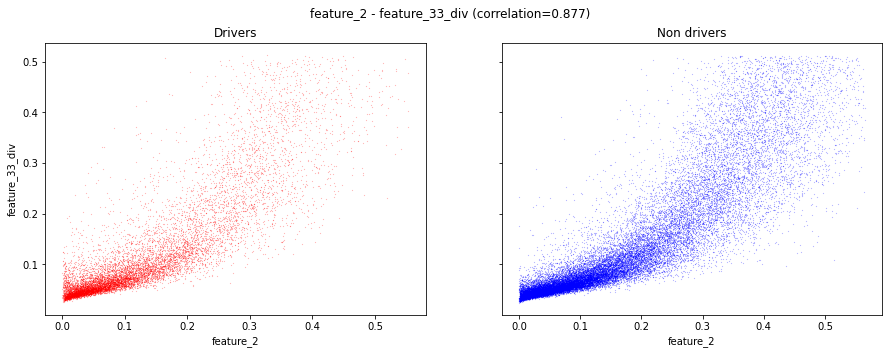

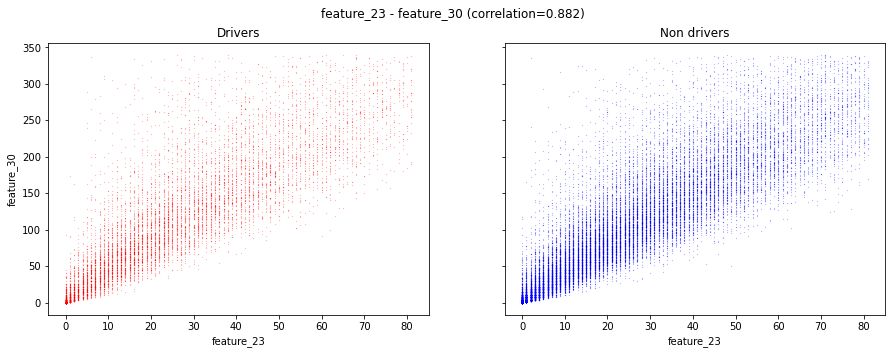

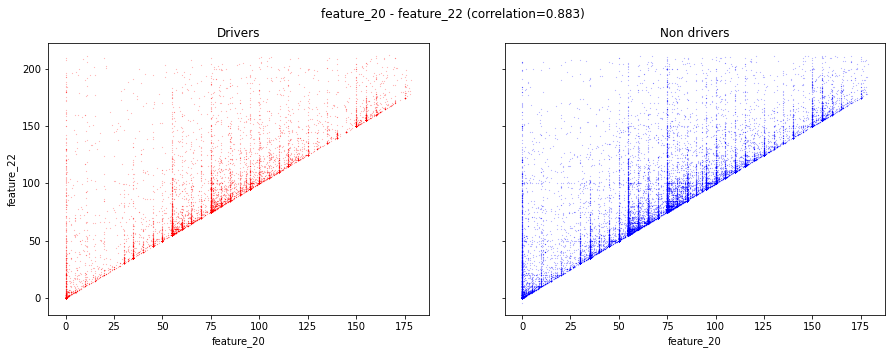

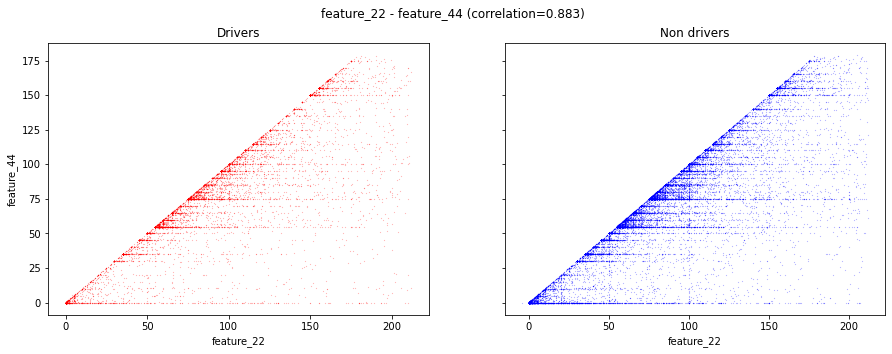

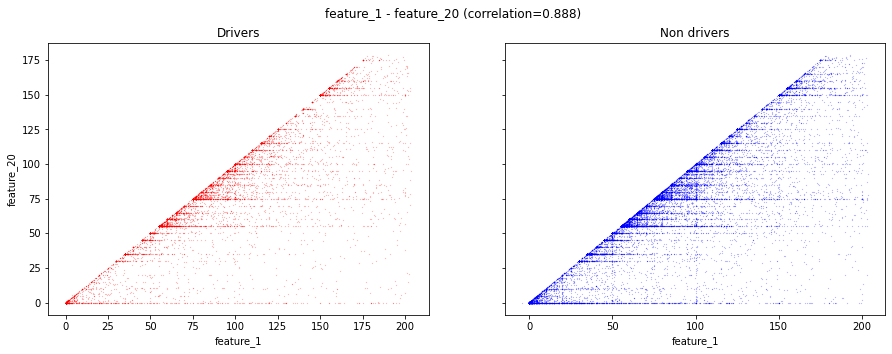

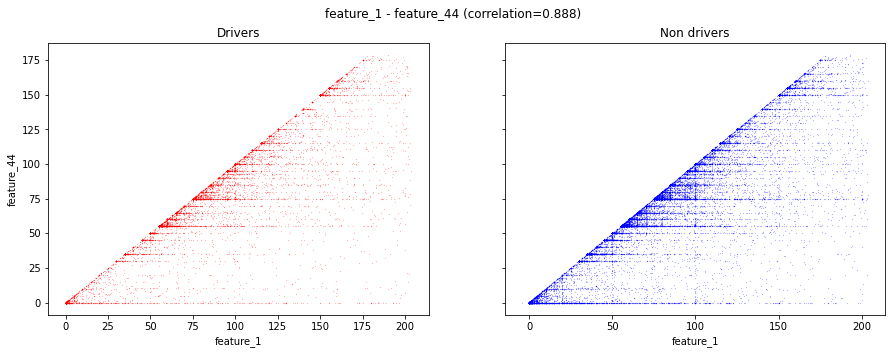

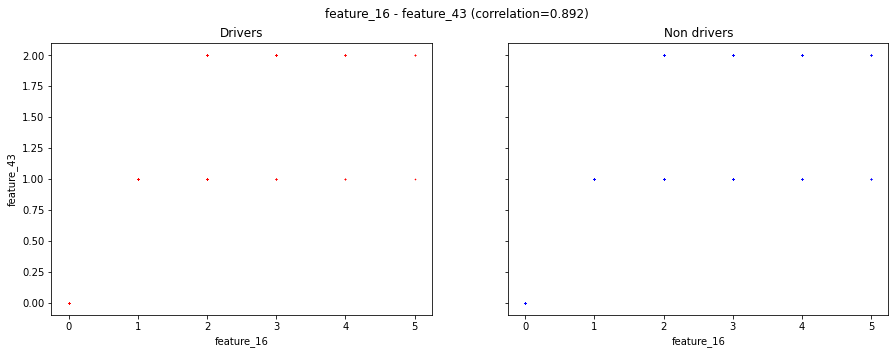

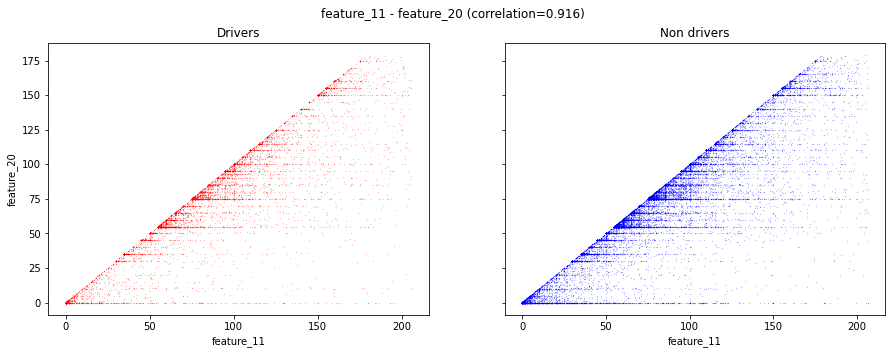

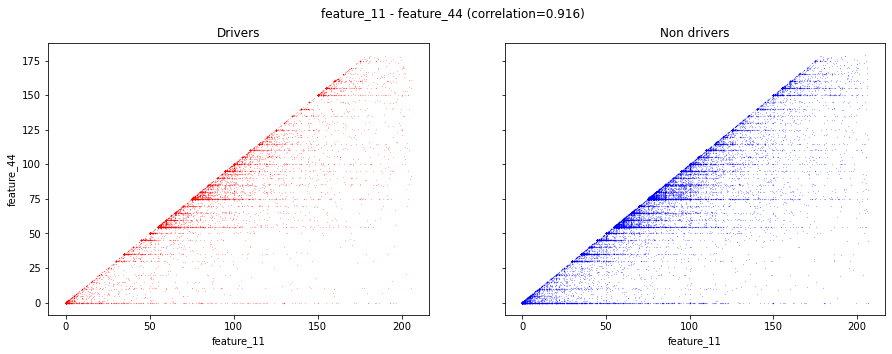

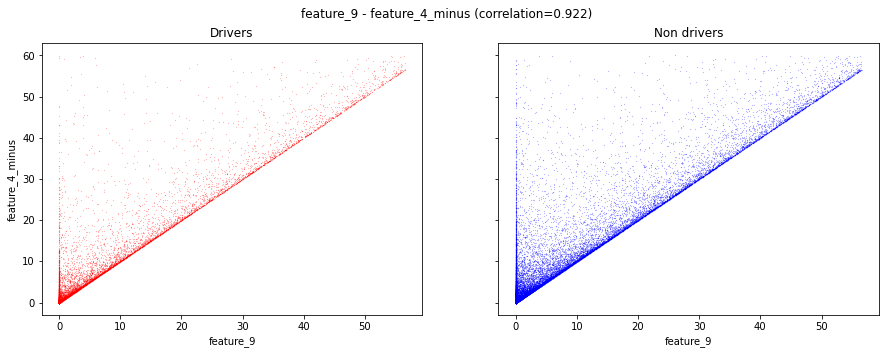

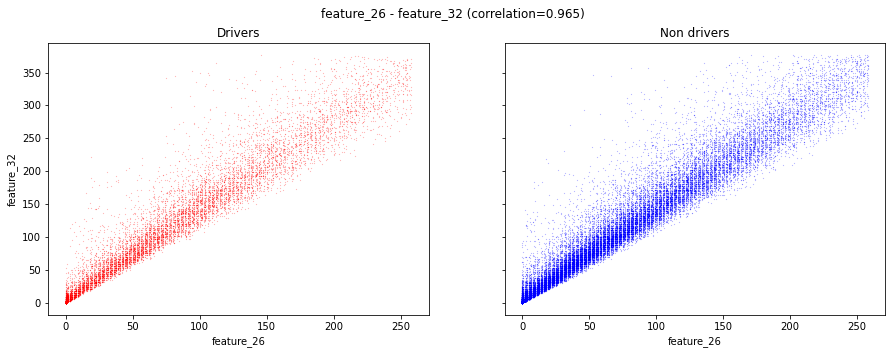

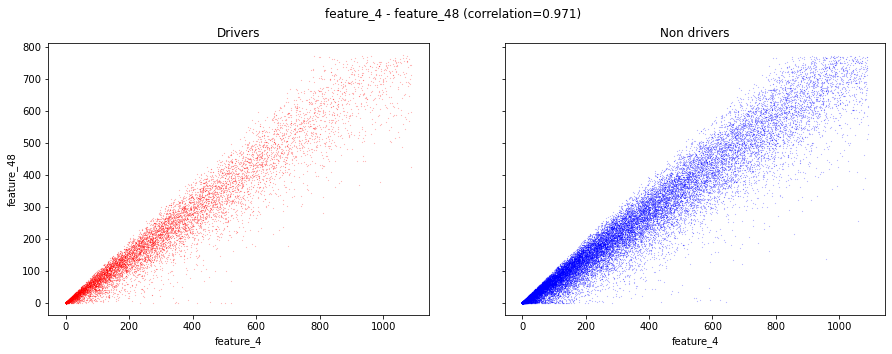

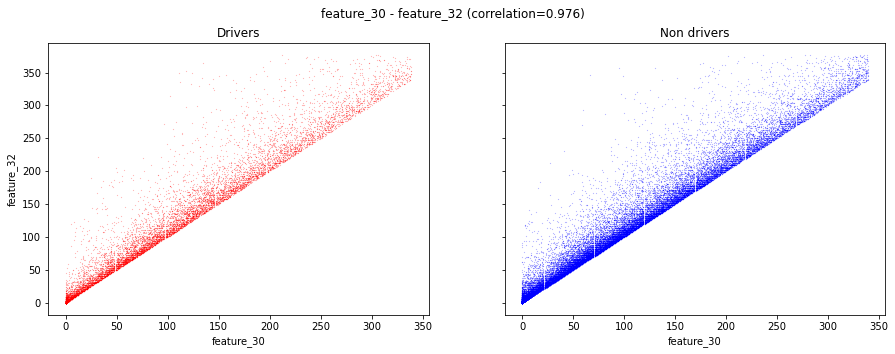

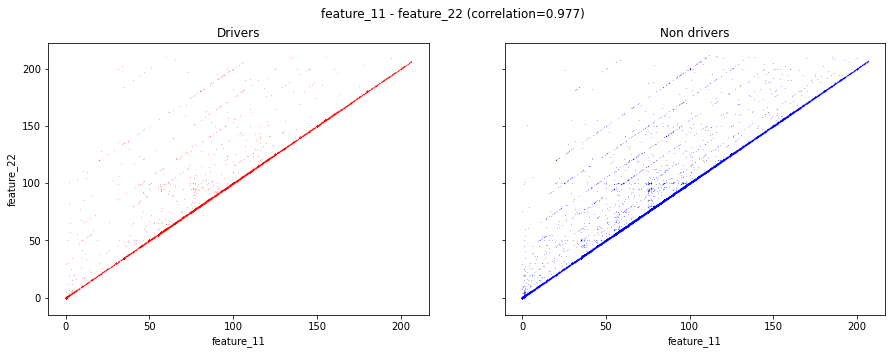

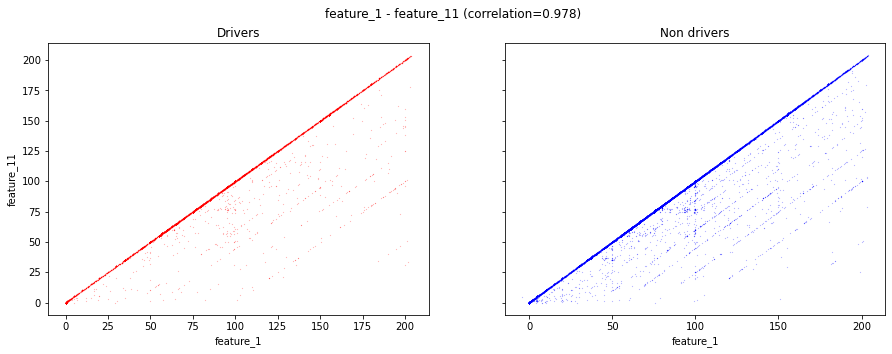

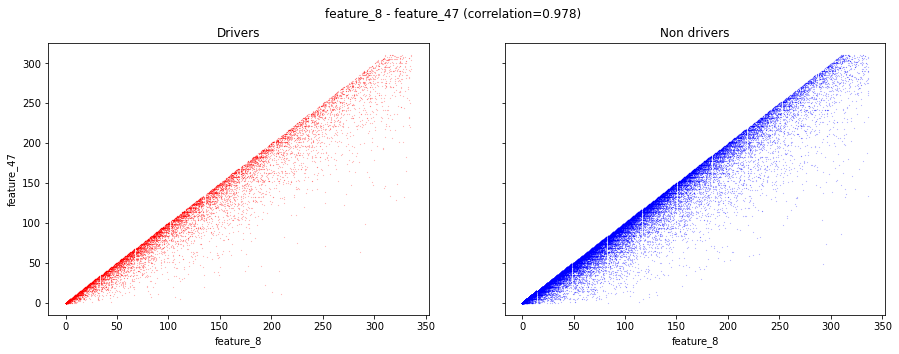

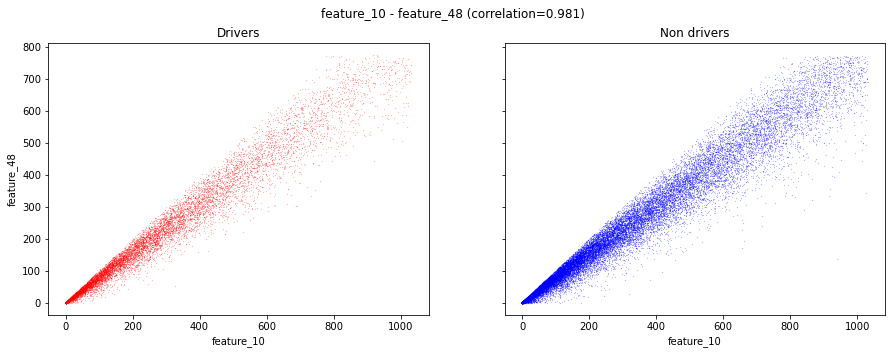

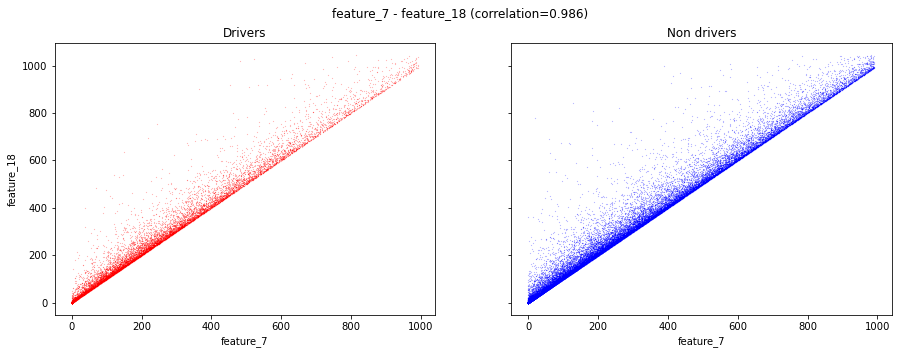

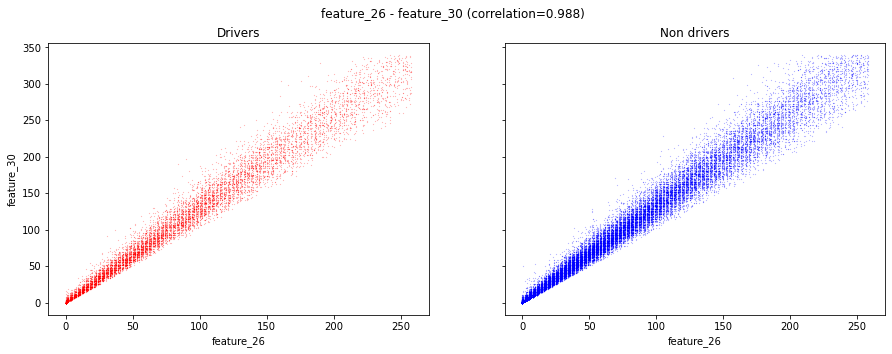

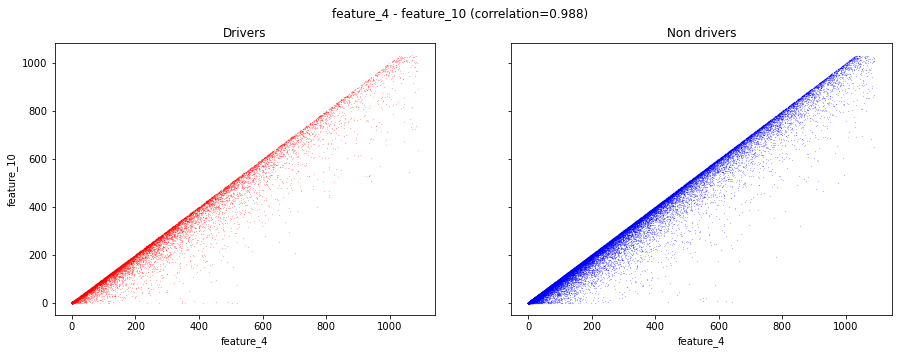

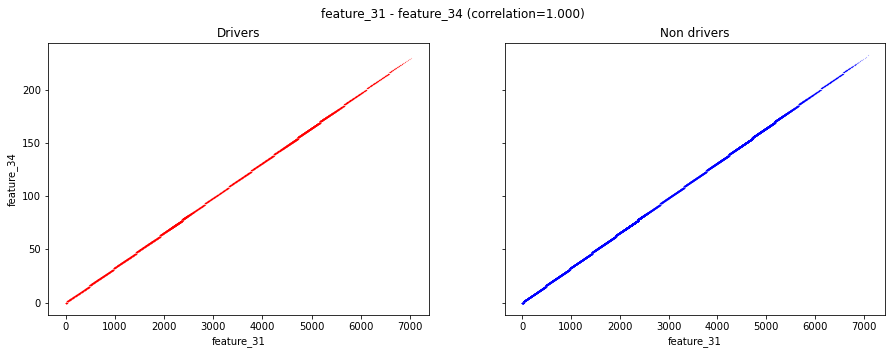

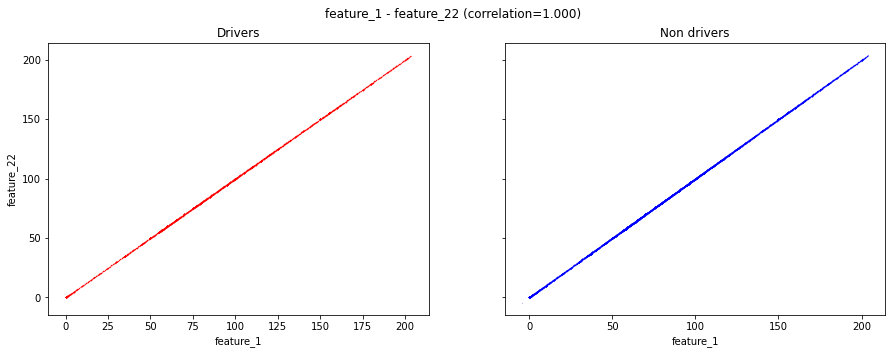

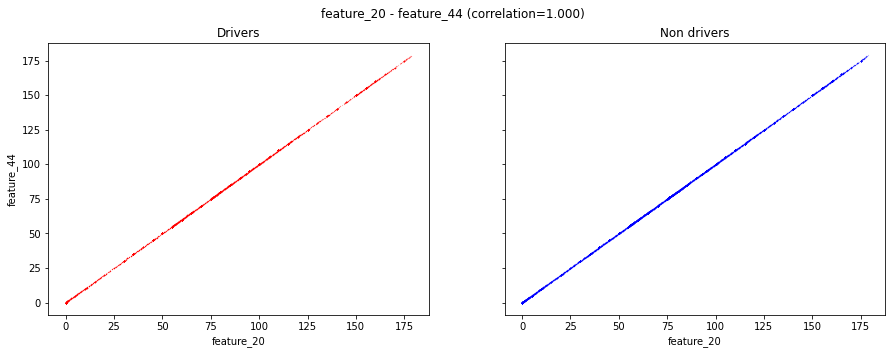

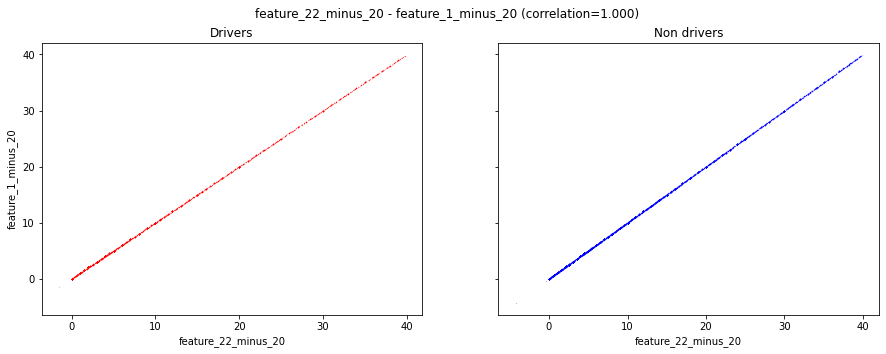

In [557]:
#most correlated features are:
#1_22(_11_20_44)
#20_44
#4_10_48(_36)
#7_18
#26_30(_32)
#31_34
#14_16(_24)
#(8_47)
#(9_49)
#(2_19_-33)

for index, pair in correlation_report.sort_values(by='correlation').iterrows():

    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle("{p.column_a} - {p.column_b} (correlation={p.correlation:.3f})".format(p=pair))

#     plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    
    data_to_combine[data_to_combine.target == 1].plot.scatter(ax=axes[0], x=pair.column_a, y=pair.column_b, s=0.01, c='red')
    axes[0].set_title('Drivers')

    data_to_combine[data_to_combine.target == 0].plot.scatter(ax=axes[1], x=pair.column_a, y=pair.column_b, s=0.01, c='blue')
    axes[1].set_title('Non drivers')

#     data_to_combine.plot.scatter(ax=axes[2], x=pair.column_a, y=pair.column_b, s=0.01, 
#                                  c=data_to_combine.target.apply(lambda x: 'red' if x == 1 else 'blue'))
#     axes[2].set_title('Both classes')

#     plt.legend(prop={'size': 16}, title = 'Features correlation')
#     plt.title("{} - {} (correlation={:.3f})".format(pair.column_a, pair.column_b, pair.correlation))
    plt.xlabel(pair.column_a)
    plt.ylabel(pair.column_b)
    plt.show()

In [558]:
#procedure combine two features with imputation of skipped values
#shrinks result to mean and standard deviation of feature1
# df - input/output dataframe
# feature1, feature2 - string name of features to combine
# combined_feature_name - string name of new combined column
# feature1_weight - weight of feature1
# correlation_sign - -1 if feature2 has opposite sign; 1 otherwise
def combine_na(df, feature1, feature2, combined_feature_name, feature1_weight=0.5, correlation_sign=1):
    #calculate means and standard deviation for both non-null values
    df_f1_f2 = df[{feature1, feature2}].dropna()
    f1_mean = df_f1_f2[feature1].mean()
    f1_std = df_f1_f2[feature1].std() 
    f2_mean = df_f1_f2[feature2].mean()
    f2_std = df_f1_f2[feature2].std() 
    f1_f2_ratio = correlation_sign * f1_std / f2_std

    f2_shrinked = feature2 + '_shrinked_to_' + feature1
    d_f2_shrinked = df[feature2].add(-f2_mean).mul(f1_f2_ratio).add(f1_mean)
    df[combined_feature_name] = (
        ((df[feature1] + d_f2_shrinked) / 2)
        .mask(pd.isnull, df[feature1])
        .mask(pd.isnull, d_f2_shrinked)
    )

In [559]:
delete_combined = False
features_to_combine = [
    #obviously correlated
    ('feature_1', 'feature_22', 'feature_1_22', 0.5),
    ('feature_20', 'feature_44', 'feature_20_44', 0.5),
    ('feature_31', 'feature_34', 'feature_31_34', 0.5),

    ('feature_26', 'feature_30', 'feature_26_30', 0.5),
    ('feature_26_30', 'feature_32', 'feature_26_30_32', 0.67),
    ('feature_4', 'feature_10', 'feature_4_10', 0.5),
    ('feature_4_10', 'feature_48', 'feature_4_10_48', 0.67),
    
    ('feature_4_10_48', 'feature_36', 'feature_4_10_48_36', 0.75),
    ('feature_7', 'feature_18', 'feature_7_18', 0.5),
    ('feature_14', 'feature_16', 'feature_14_16', 0.5)
]

for feature in features_to_combine: 
    combine_na(data_to_combine, feature[0], feature[1], feature[2], feature[3])
    if delete_combined:
        data_to_combine = data_to_combine.drop(columns=[feature[0], feature[1]], errors='ignore')

In [560]:
data_to_combine.columns

Index(['period', 'id', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_40', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_33_div', 'feature_4_minus', 'feature_10_minus',
       'feature_22_minus_20', 'feature_22_minus_44', 'feature_1_minus_20',
       'feature_25_encoded', 'target', 'feature_1_22', 'feature_20_44',
       'feature_31_34', 'feature_26_30', 'feature_26_30_32', 'feature_4_10',
       'feature_4_10_48', 'feature_4_10

In [561]:
print('Before combining:')
print('Shape: ', targeted_data.shape)
print('Shape w/o NaN: ', data_to_combine.dropna(how='any').shape)
print('\nAfter combining:')
print('Shape: ', data_to_combine.shape)
print('Shape w/o NaN: ', data_to_combine.dropna(how='any').shape)

Before combining:
Shape:  (59426, 63)
Shape w/o NaN:  (4424, 63)

After combining:
Shape:  (59426, 63)
Shape w/o NaN:  (4424, 63)


### Find categorical features

In [562]:
#suppose categorical if
# object type
# numeric type and...
#   few uniques
#   significant class1 distribution between adjacent values
# it should treat NaN as another value if class1 probability for NaNs is different to mean that of (0.263) 

In [563]:
input_data = data_to_combine
# input_data = targeted_data #disable combine

input_data.columns

Index(['period', 'id', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_40', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_33_div', 'feature_4_minus', 'feature_10_minus',
       'feature_22_minus_20', 'feature_22_minus_44', 'feature_1_minus_20',
       'feature_25_encoded', 'target', 'feature_1_22', 'feature_20_44',
       'feature_31_34', 'feature_26_30', 'feature_26_30_32', 'feature_4_10',
       'feature_4_10_48', 'feature_4_10

In [564]:
print("Candidates to categorical features")
nuniques = pd.DataFrame({'nunique':input_data.drop(columns=ids).drop(columns=['target']).nunique()})
probablyCategorical = nuniques.sort_values('nunique').head(5)
probablyCategorical

Candidates to categorical features


nunique
feature_43                3
feature_24                3
feature_14                3
feature_16                6
feature_25_encoded        8

In [565]:
# def print_categorical_report(df, feature):
#     total_count = 0
#     for i in df[feature].unique():
#         if pd.isna(i):
#             continue
#         total = df[df[feature] == i].shape[0]
#         class1 = (df[df[feature] == i].target == 1).sum()
        
#         class0 = (df[df[feature] == i].target == 0).sum()
#         print(i, ': ', total, ' target 1_0 ratio: ', class1, class0, class1/class0)
#         total_count += class1 + class0
#     class1 = (df[df[feature].isna()].target == 1).sum()
#     class0 = (df[df[feature].isna()].target == 0).sum()
#     total_count += class1 + class0
#     print('NaN: ', df[df[feature].isna()].shape[0], 
#           ' target 1_0 ratio: ', class1, class0, class1/class0 if class0 != 0 else np.nan)
# #     print(total_count)
# #     print((~df.target.isna()).sum())
# print_categorical_report(input_data, 'feature_24')

<Figure size 1120x400 with 0 Axes>

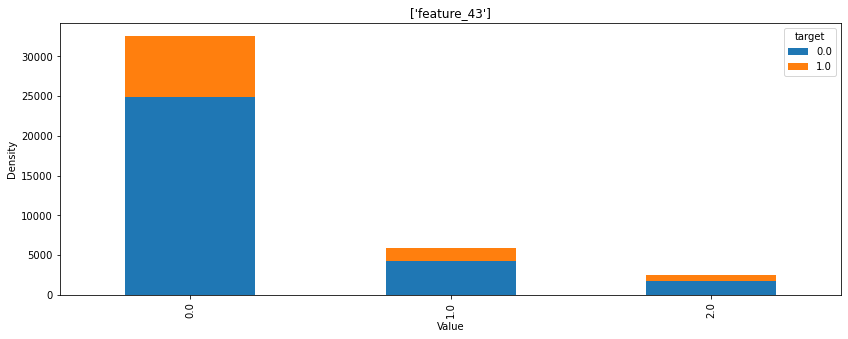

<Figure size 1120x400 with 0 Axes>

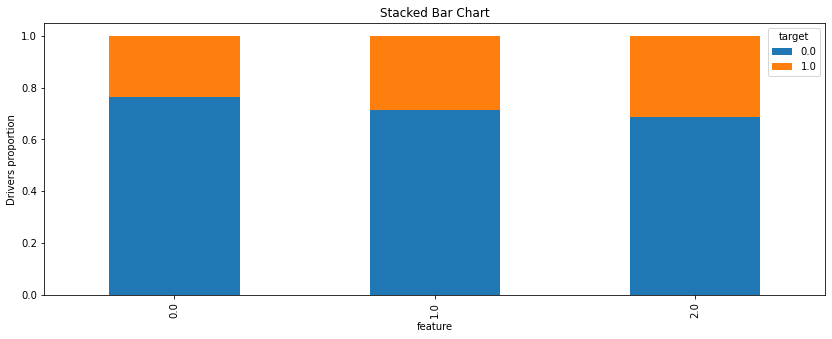

<Figure size 1120x400 with 0 Axes>

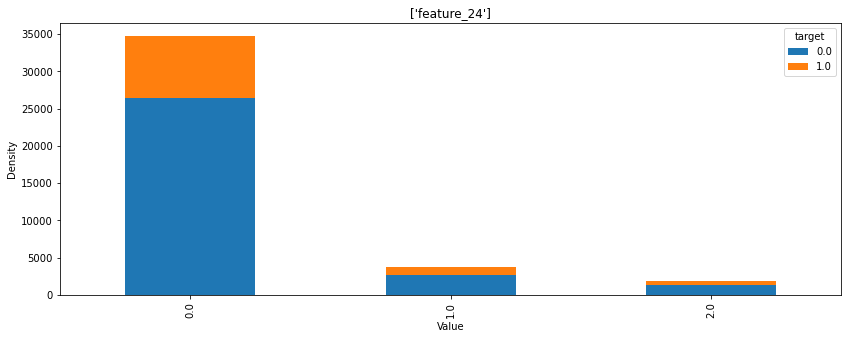

<Figure size 1120x400 with 0 Axes>

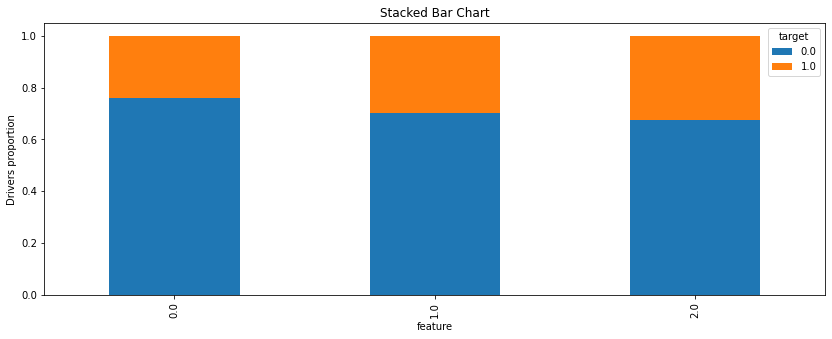

<Figure size 1120x400 with 0 Axes>

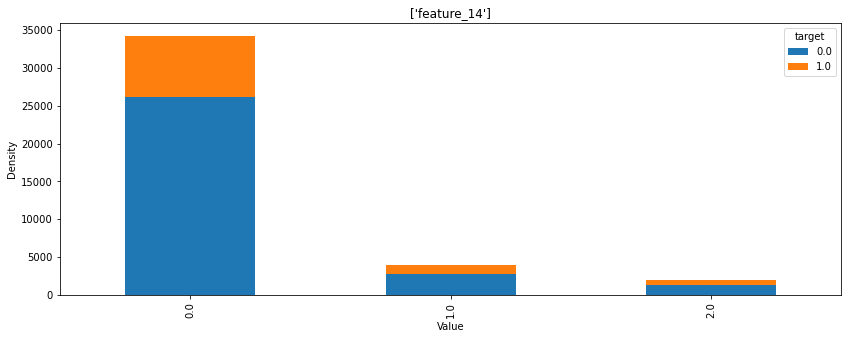

<Figure size 1120x400 with 0 Axes>

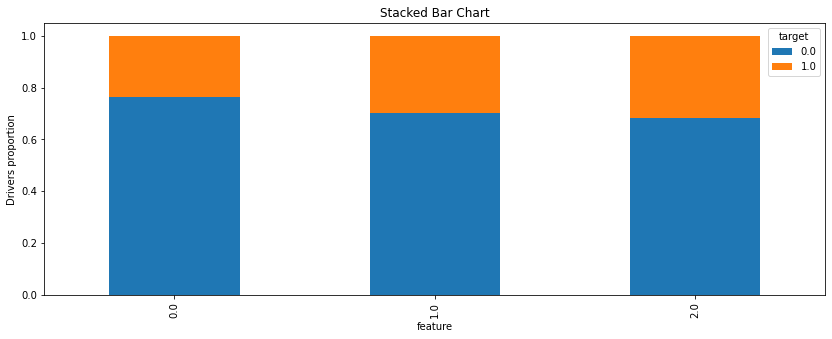

<Figure size 1120x400 with 0 Axes>

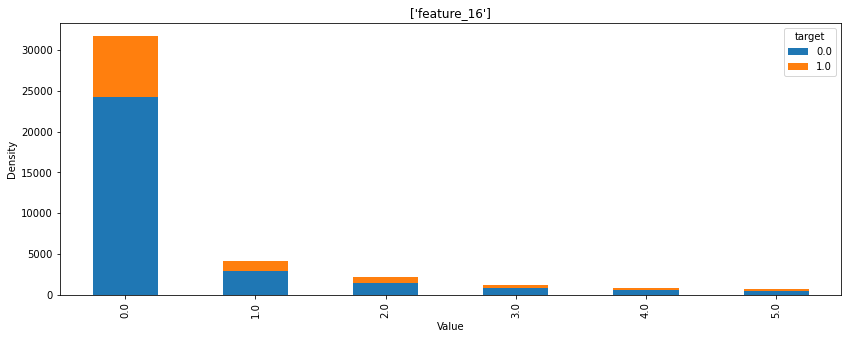

<Figure size 1120x400 with 0 Axes>

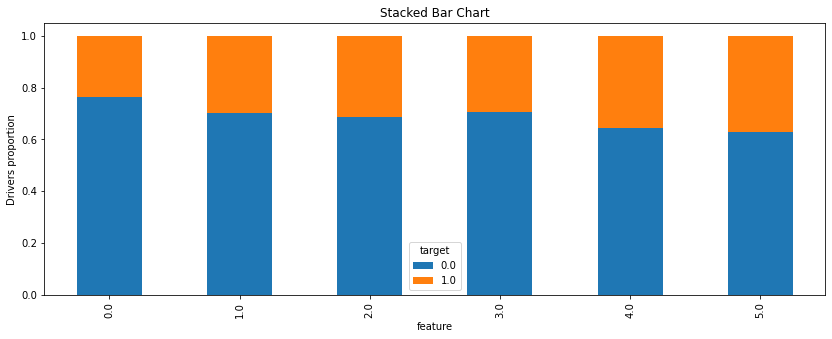

<Figure size 1120x400 with 0 Axes>

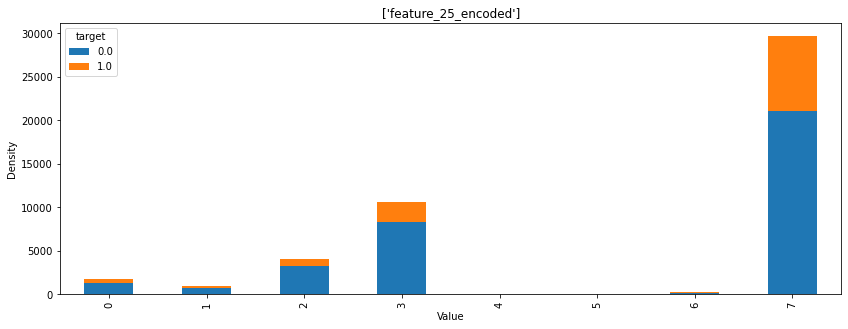

<Figure size 1120x400 with 0 Axes>

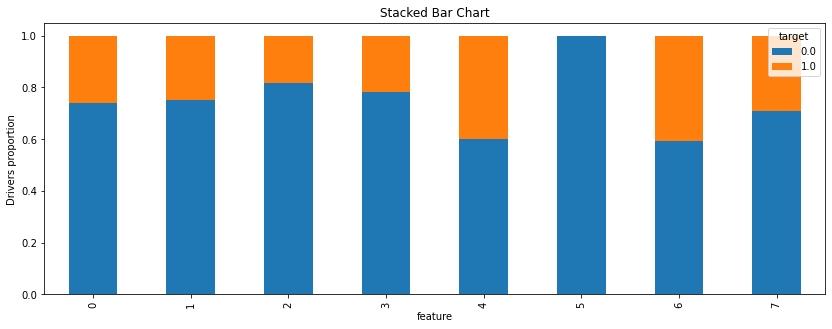

In [566]:
for feature in probablyCategorical.index:
    plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
#     fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle(feature)

    table = pd.crosstab(input_data[feature],input_data.target)

#     hist_bins = input_data[feature].nunique()
#     df1 = input_data[input_data.target == 1][feature]
#     df0 = input_data[input_data.target == 0][feature]

# plt.hist(df, color = 'blue', edgecolor = 'black',
#          bins = df.nunique())

# plt.hist(df, color = 'yellow', edgecolor = 'black',
#          bins = df.nunique())

    # seaborn histogram
#     sns.distplot(df1, hist=True, kde=False, 
#                  bins=hist_bins, color = 'blue',
#                  hist_kws={'edgecolor':'black'})
#     sns.distplot(df0, hist=True, kde=False, 
#                  bins=hist_bins, color = 'yellow',
#                  hist_kws={'edgecolor':'black'})
#     sns.histplot(df1, kde=False, bins=hist_bins, color = 'blue')
#     sns.histplot(df0, kde=False, bins=hist_bins, color = 'yellow')

    table.plot(kind='bar', stacked=True, figsize=(14,5))

    # Add labels
    plt.title([feature])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()
    

    plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
    percent_table = table.div(table.sum(1).astype(float), axis=0)
#     sns.barplot(x=percent_table.index, y=percent_table.columns[0], data=percent_table, color = 'blue')
#     sns.barplot(x=percent_table.index, y=percent_table.columns[1], data=percent_table, color = 'yellow')
    percent_table.plot(kind='bar', stacked=True, figsize=(14,5))
    plt.title('Stacked Bar Chart')
    plt.xlabel('feature')
    plt.ylabel('Drivers proportion')

    plt.show()

#### Define categorical and noncategorical features

In [717]:
categoricalFeatures = {'feature_25_encoded'}

In [719]:
nonCategoricalFeatures = set(
    input_data.columns.array
) - categoricalFeatures
nonCategoricalFeatures

{'feature_1',
 'feature_10',
 'feature_10_minus',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_14_16',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_1_22',
 'feature_1_minus_20',
 'feature_2',
 'feature_20',
 'feature_20_44',
 'feature_21',
 'feature_22',
 'feature_22_minus_20',
 'feature_22_minus_44',
 'feature_23',
 'feature_24',
 'feature_26',
 'feature_26_30',
 'feature_26_30_32',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_3',
 'feature_30',
 'feature_31',
 'feature_31_34',
 'feature_32',
 'feature_33',
 'feature_33_div',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_4',
 'feature_40',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_4_10',
 'feature_4_10_48',
 'feature_4_10_48_36',
 'feature_4_minus',
 'feature_6',
 'feature_7',
 'feature_7_18',
 'feature_8',
 'feature_9',
 'id',
 'period',
 'target'}

## Fill empty values

In [691]:
selected_input_data = input_data[nonCategoricalFeatures]
print('Count of non-NaNs rows before filling: ', selected_input_data.shape[0] - selected_input_data.dropna().shape[0])
filled_data = selected_input_data.interpolate(method='linear').fillna(0)
print('Count of non-NaNs rows after filling: ', filled_data.shape[0] - filled_data.dropna().shape[0])
filled_data['target'] = input_data.target
filled_data

Count of non-NaNs rows before filling:  53758
Count of non-NaNs rows after filling:  0


feature_1  feature_2   feature_3  feature_4  feature_6  feature_7  \
0           55.0   0.432017    0.000000     176.78   0.323712       0.00   
1          110.0   0.397517    0.000000     315.42   0.316798       0.00   
2           55.0   0.359440    0.000000     354.55   0.339188       0.00   
3           55.0   0.285707    0.000000     229.98   0.415428       0.00   
4           55.0   0.101487  444.730391     307.12   0.569670       0.00   
...          ...        ...         ...        ...        ...        ...   
59421       77.0   0.101403    0.000000      95.30   0.094381     221.85   
59422       77.0   0.101403    0.000000      61.87   0.105878     343.22   
59423      106.5   0.101403    0.000000      88.05   0.040169     259.33   
59424       45.0   0.101403    0.000000      98.40   0.040810     222.00   
59425       35.0   0.101403    0.000000      30.70   0.042272     285.35   

       feature_8  feature_9  feature_10  feature_11  ...  feature_20_44  \
0          147.0        0.0      176.78        55.0  ...           55.0   
1          135.0        0.0      315.42       110.0  ...          110.0   
2          181.0        0.0      354.48        55.0  ...           55.0   
3          142.0        0.0      229.98        55.0  ...           55.0   
4           92.0        0.0      306.17        55.0  ...           55.0   
...          ...        ...         ...         ...  ...            ...   
59421       44.0        0.0       94.93        77.0  ...           75.0   
59422       52.0        0.0       60.12        77.0  ...           75.0   
59423       46.0        0.0       79.78       106.5  ...           99.0   
59424       39.0        0.0       98.40        45.0  ...            0.0   
59425       40.0        0.0       30.70        35.0  ...            0.0   

       feature_31_34  feature_26_30  feature_26_30_32  feature_4_10  \
0        5557.544619      70.160152         65.401354    185.977332   
1        5527.327612      86.203046         80.774765    327.399322   
2        5496.610604     102.245940         96.498269    367.278111   
3        5466.393597      77.035678         71.989959    240.244858   
4        5435.676590      61.756731         61.899831    318.438709   
...              ...            ...               ...           ...   
59421    3327.703084      46.092971         41.814678    102.669906   
59422    3297.486077      41.947050         38.691437     67.851398   
59423    3266.769070      27.425603         24.778937     91.165901   
59424    3237.552062      25.161655         21.896495    106.024536   
59425    3206.835055      15.195998         12.362451     36.966048   

       feature_4_10_48  feature_4_10_48_36  feature_7_18  feature_14_16  \
0           192.389768          199.682837    309.005147      -0.005665   
1           330.116089          353.313480    400.854153      -0.005665   
2           351.309985          439.180720    495.038466      -0.005665   
3           254.559468          236.122486    372.097057      -0.005665   
4           274.249742          456.481958    194.719817      -0.005665   
...                ...                 ...           ...            ...   
59421       116.559556           96.035044    214.417504      -0.011330   
59422        74.233548           77.155407    339.805969      -0.011330   
59423       104.257809           78.366300    259.545517      -0.011330   
59424        77.940345          201.199263    221.850653      -0.011330   
59425        45.629004           41.777454    305.896377      -0.011330   

       target  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
59421     NaN  
59422     NaN  
59423     NaN  
59424     NaN  
59425     NaN  

[59426 rows x 60 columns]

In [ ]:
#input_data[nonCategoricalFeatures].fillna(0)

## Visualize target distribution

In [692]:
features = input_data.columns.drop(ids).drop(['target'])
# features = ['period']
features

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_40',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_33_div',
       'feature_4_minus', 'feature_10_minus', 'feature_22_minus_20',
       'feature_22_minus_44', 'feature_1_minus_20', 'feature_25_encoded',
       'feature_1_22', 'feature_20_44', 'feature_31_34', 'feature_26_30',
       'feature_26_30_32', 'feature_4_10', 'feature_4_10_48',
       'feature_4_10_48_36', 'feature_7_18', '

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


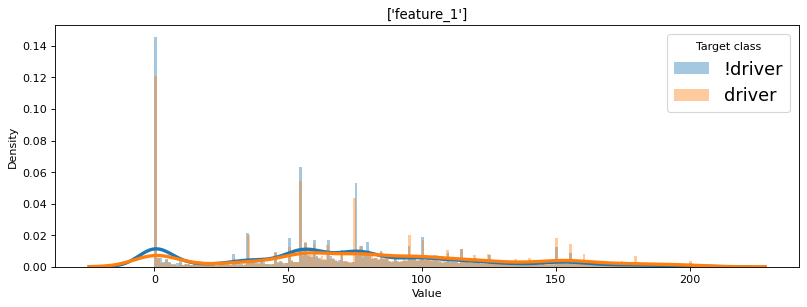

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


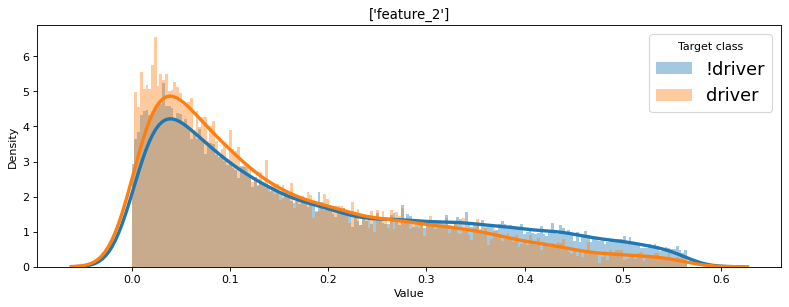

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


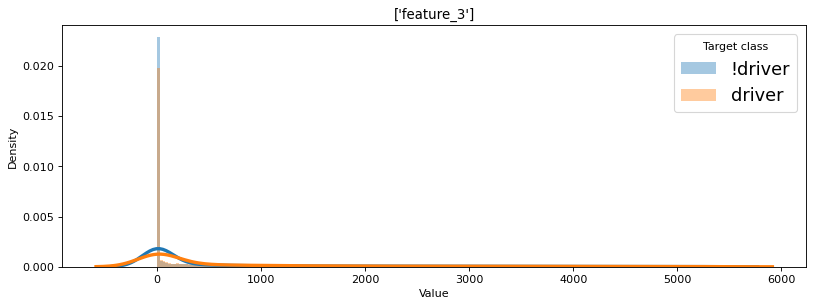

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


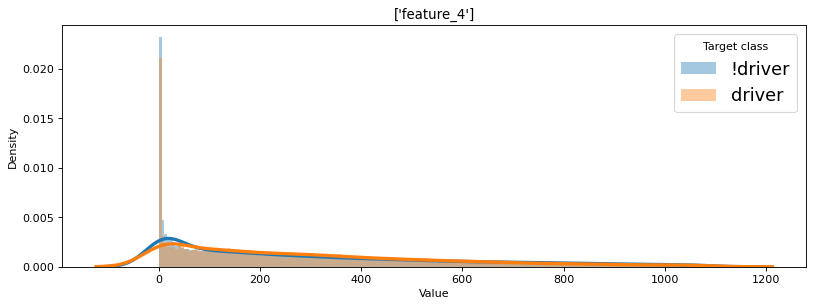

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


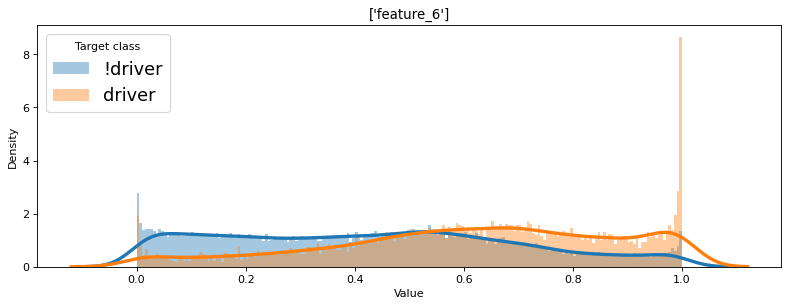

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


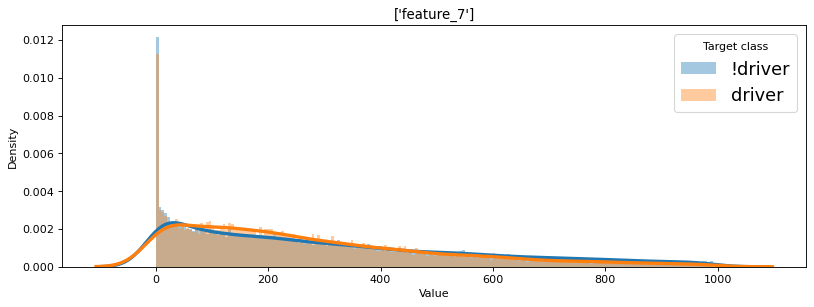

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


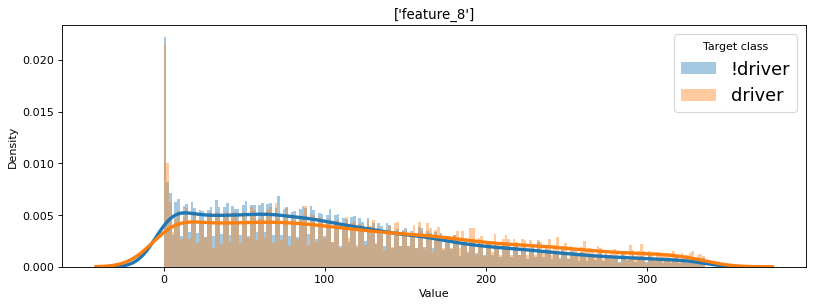

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


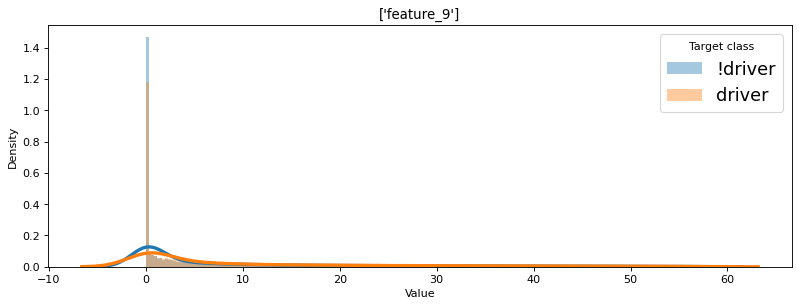

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


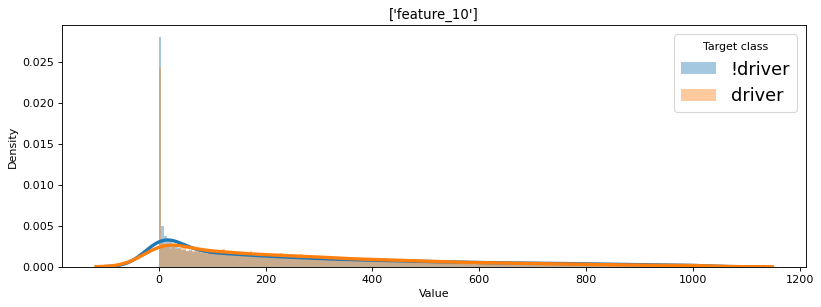

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


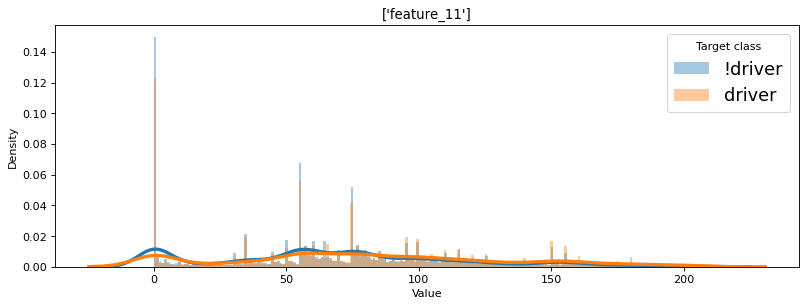

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


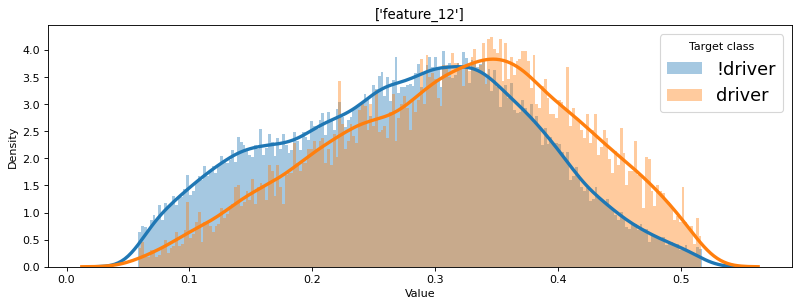

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


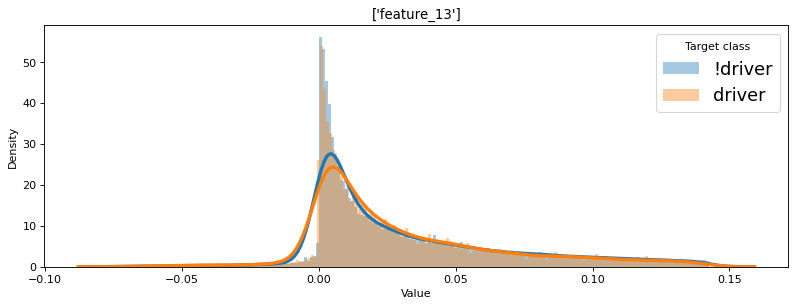

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


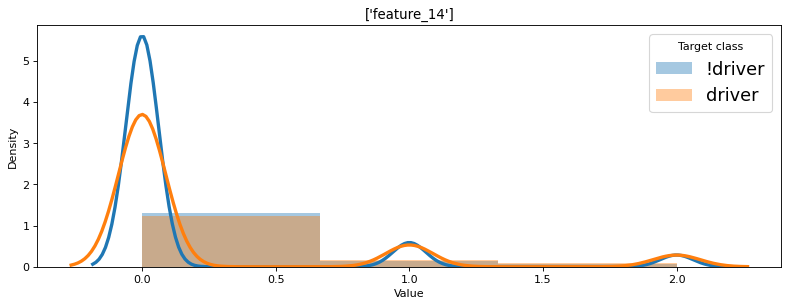

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


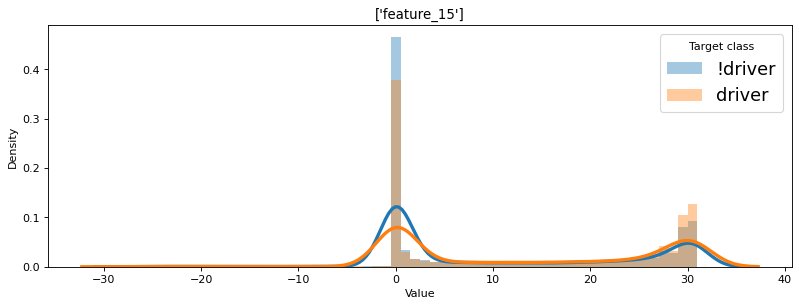

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


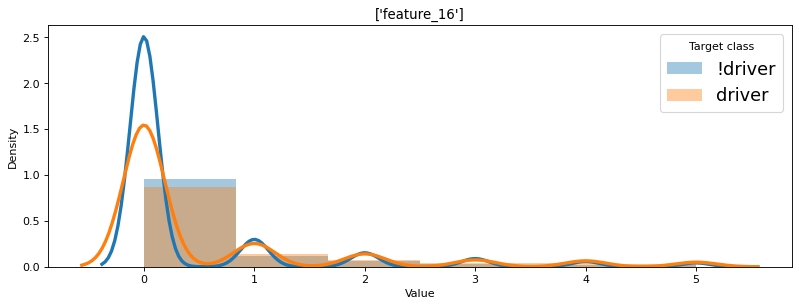

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


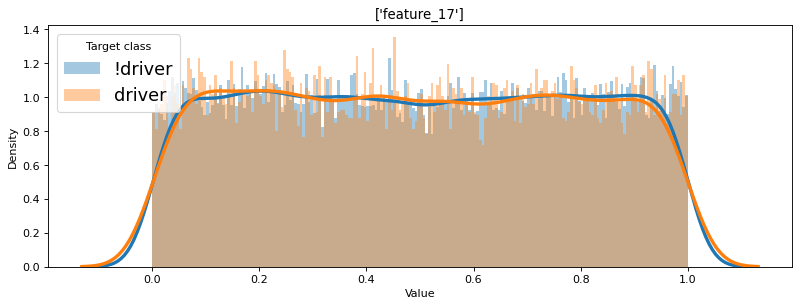

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


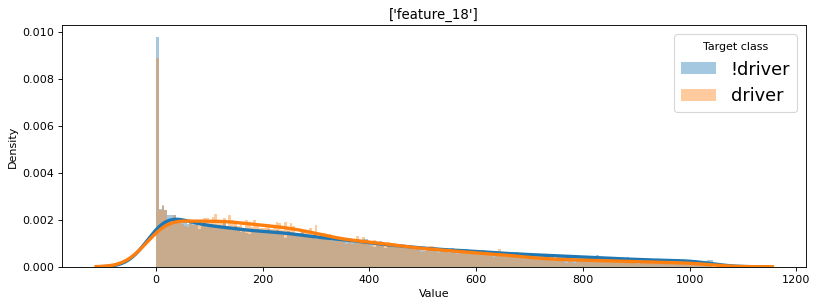

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


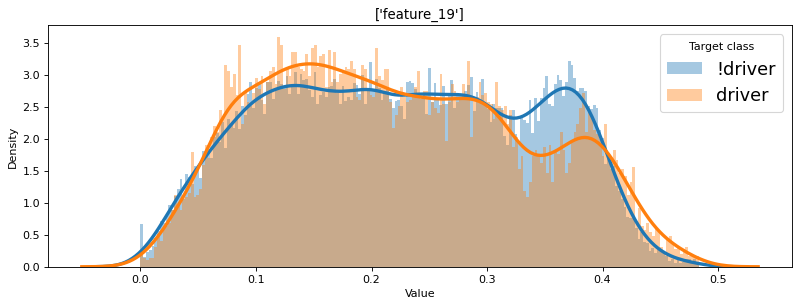

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


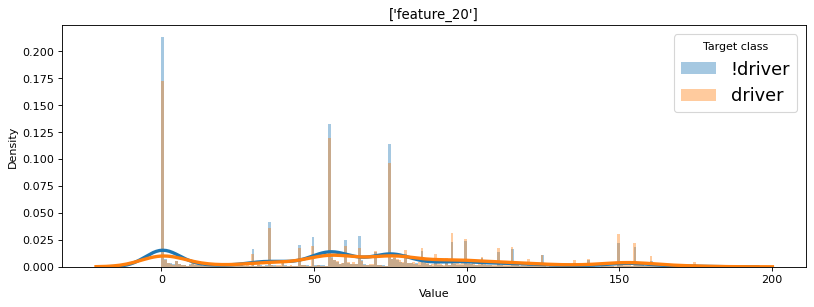

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


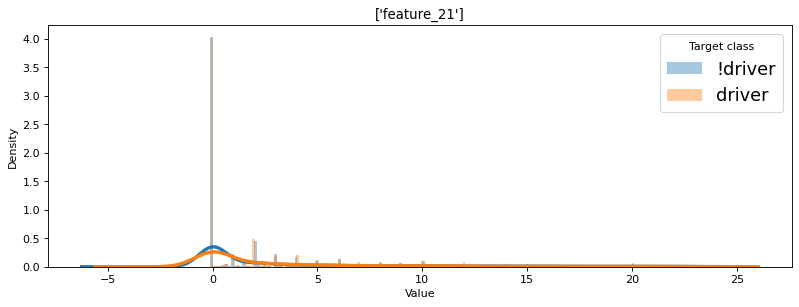

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


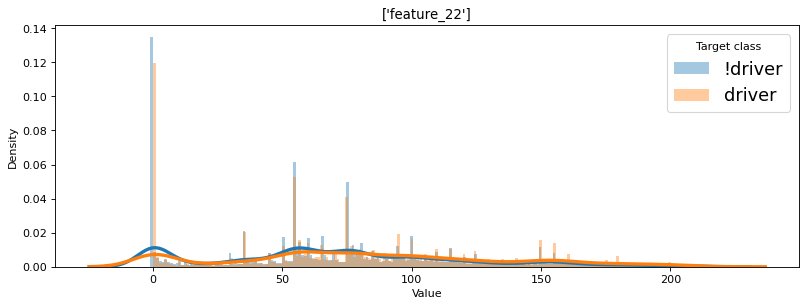

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


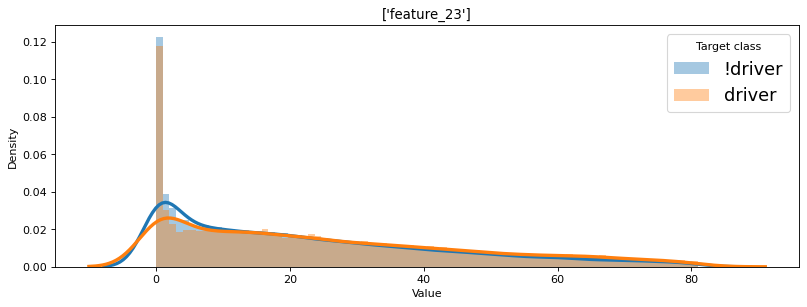

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


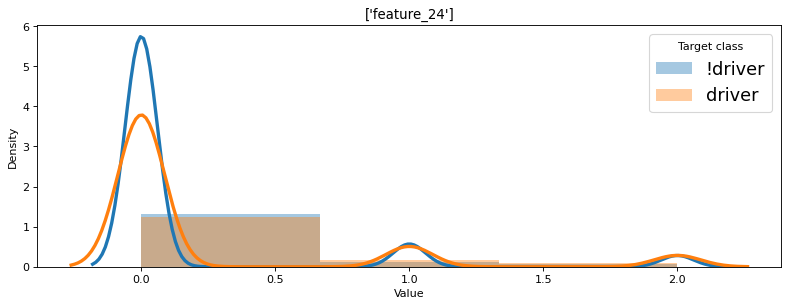

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


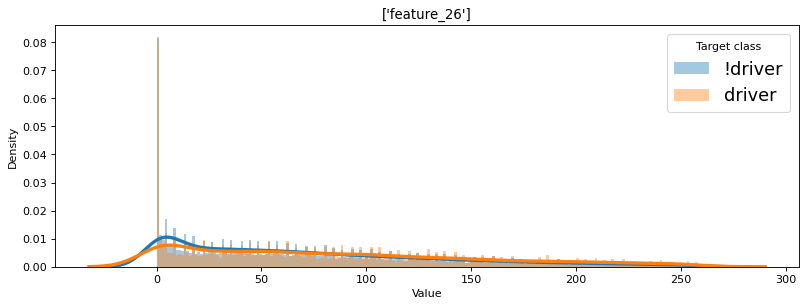

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


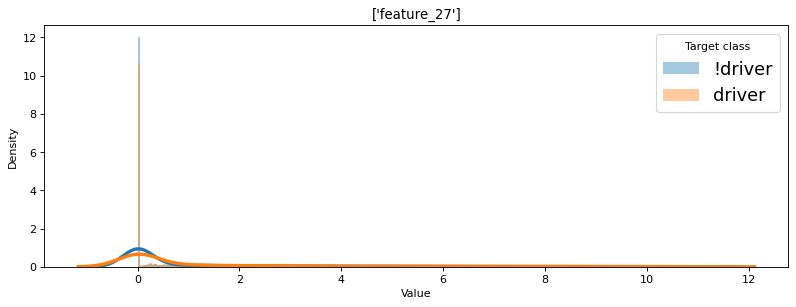

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


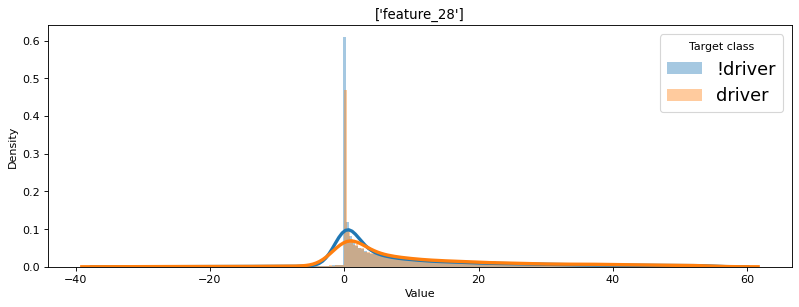

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


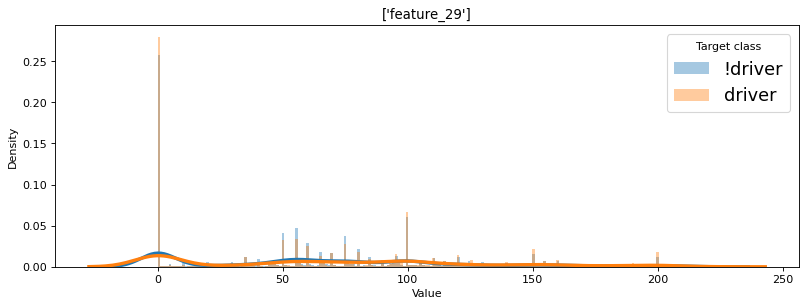

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


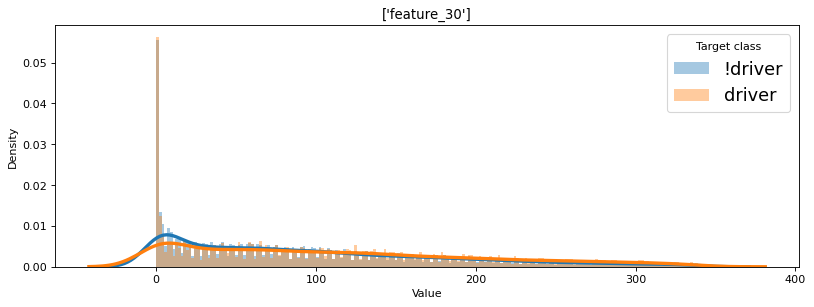

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


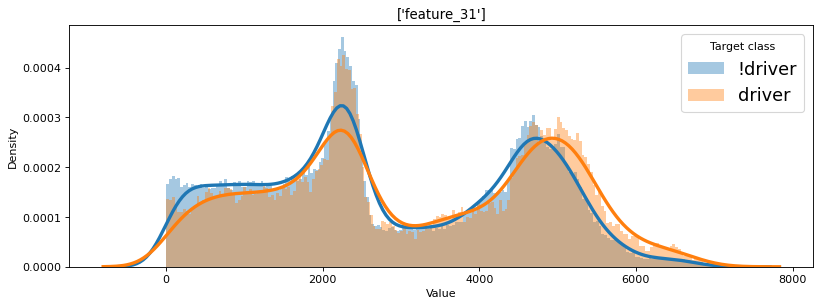

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


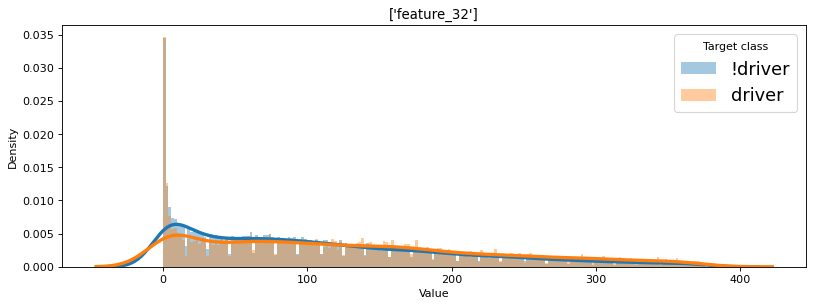

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


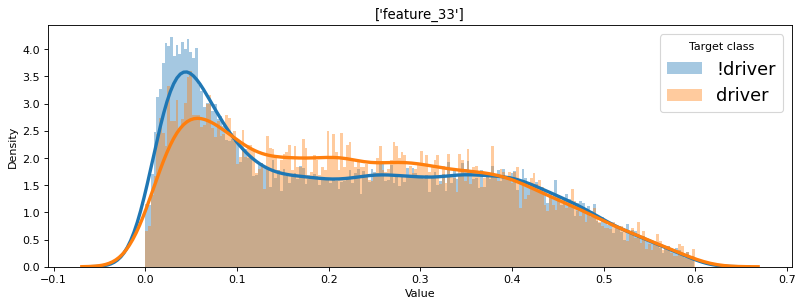

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


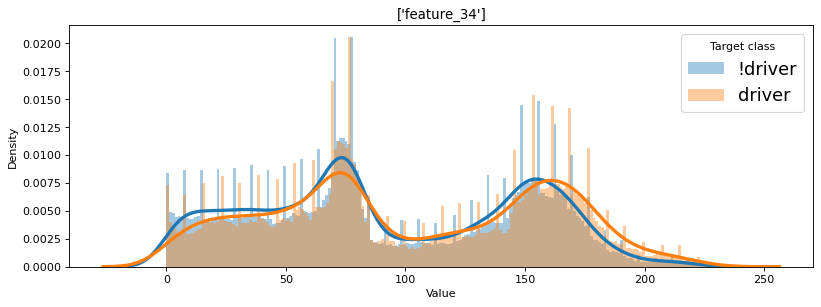

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


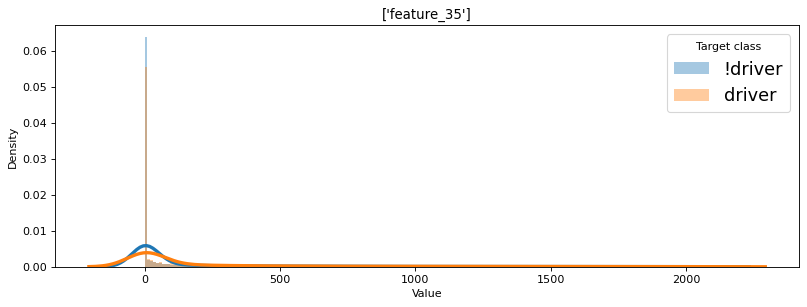

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


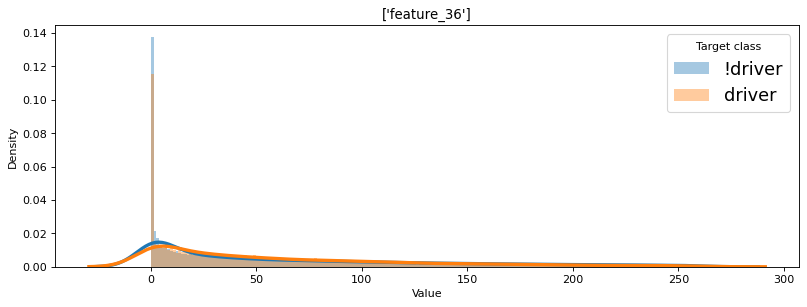

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


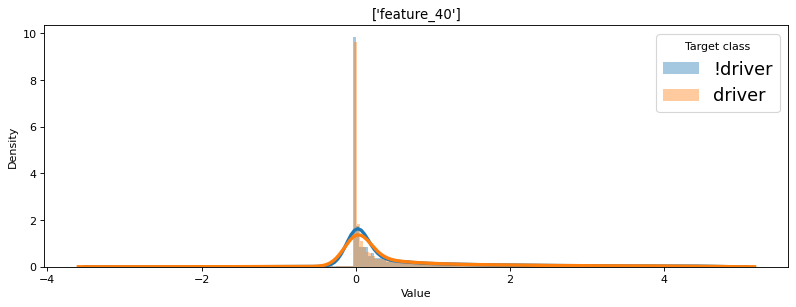

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


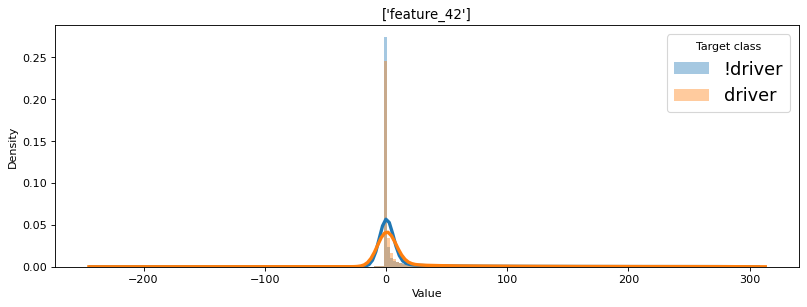

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


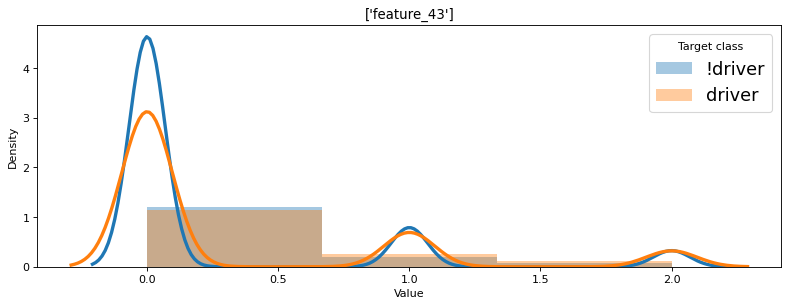

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


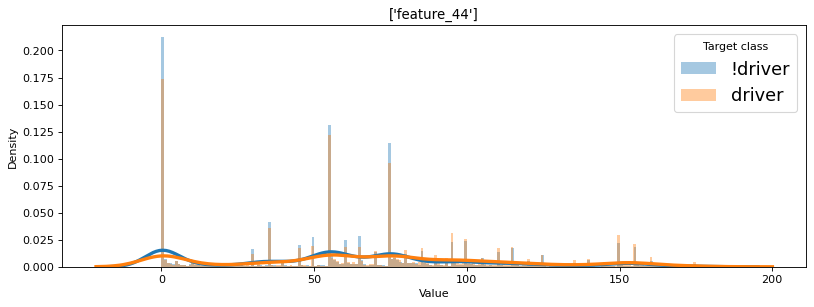

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


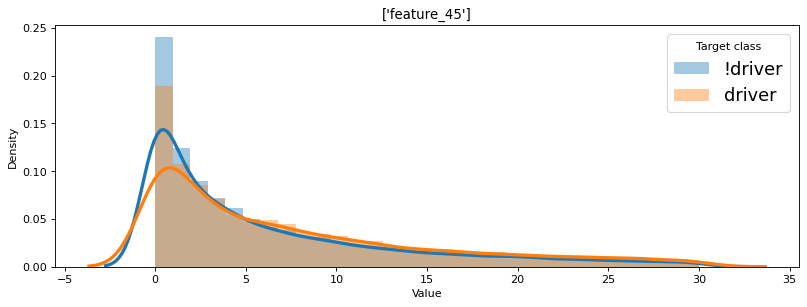

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


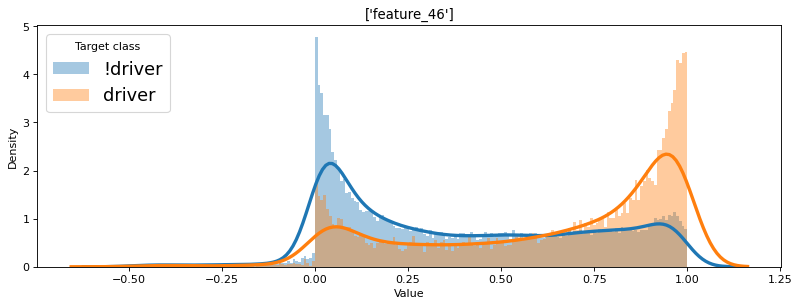

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


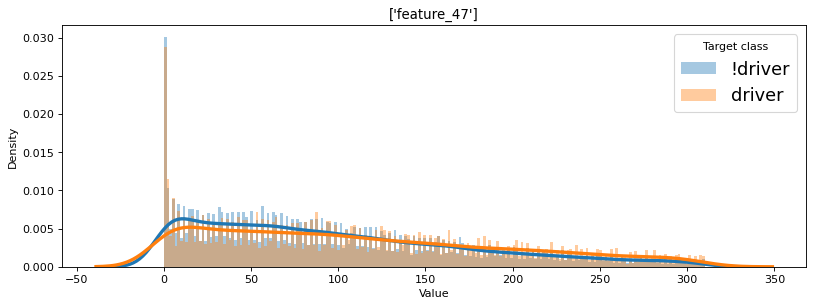

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


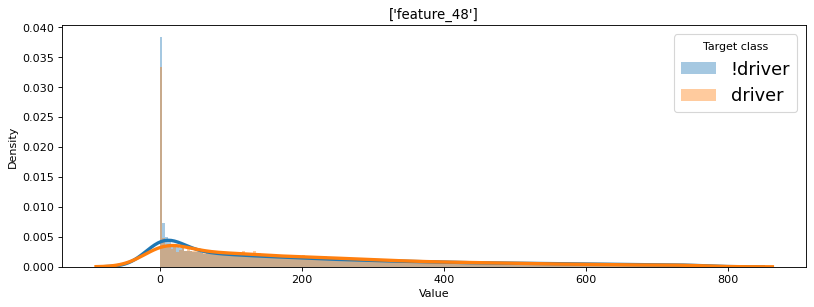

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


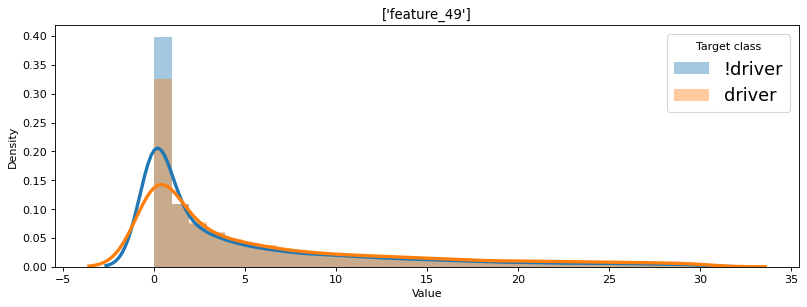

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


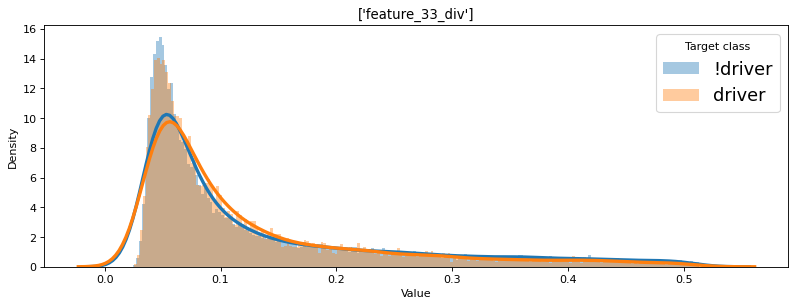

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


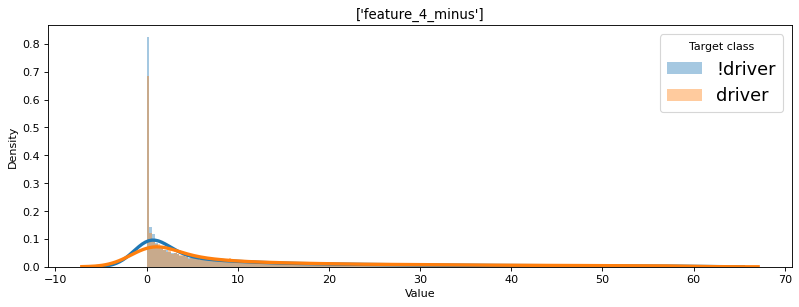

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


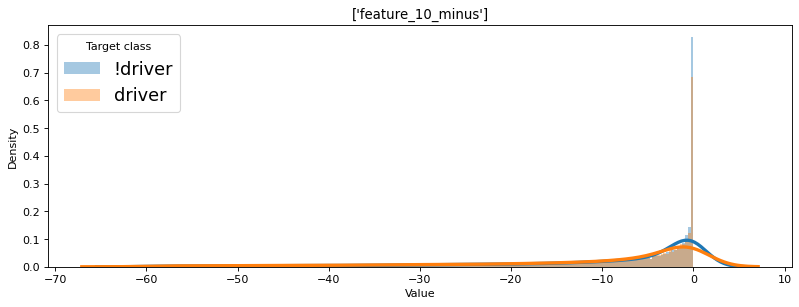

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


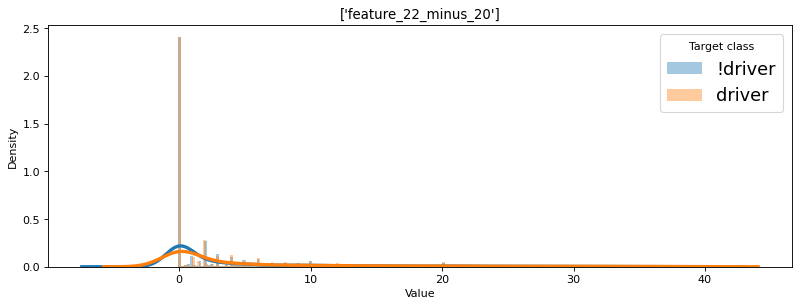

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


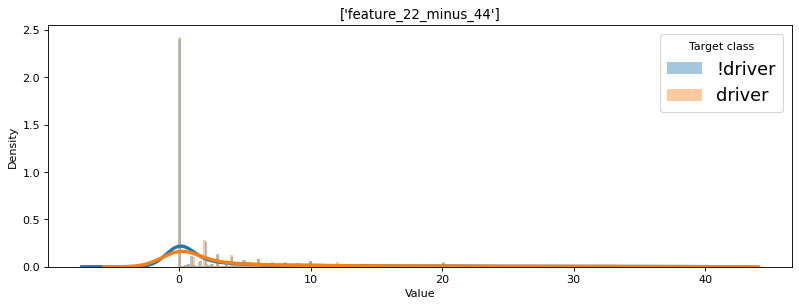

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


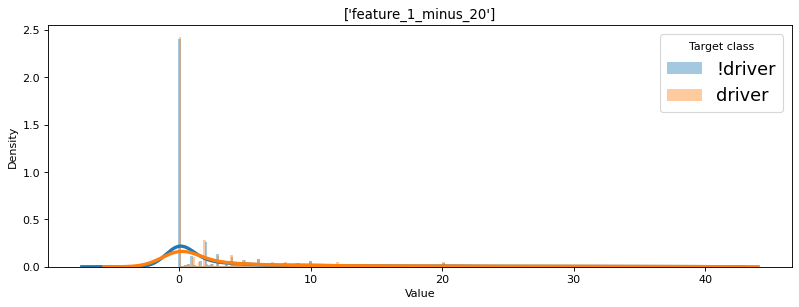

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


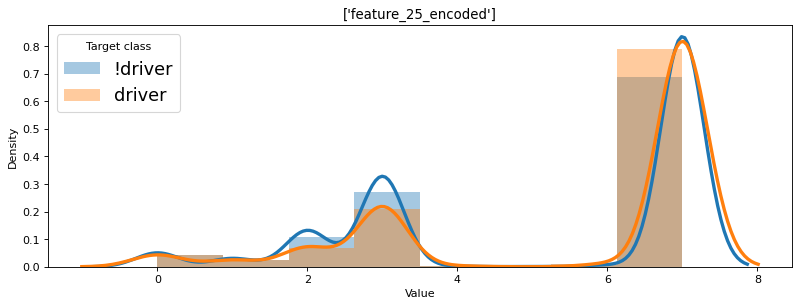

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


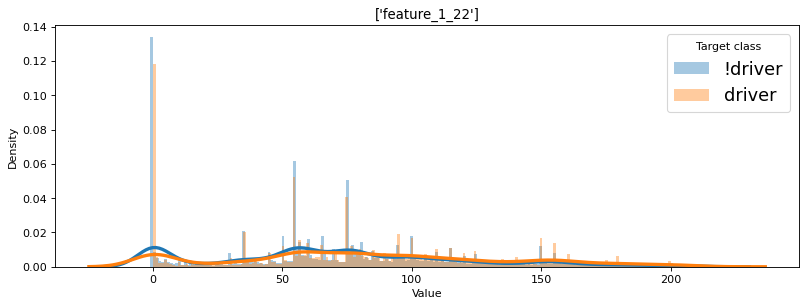

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


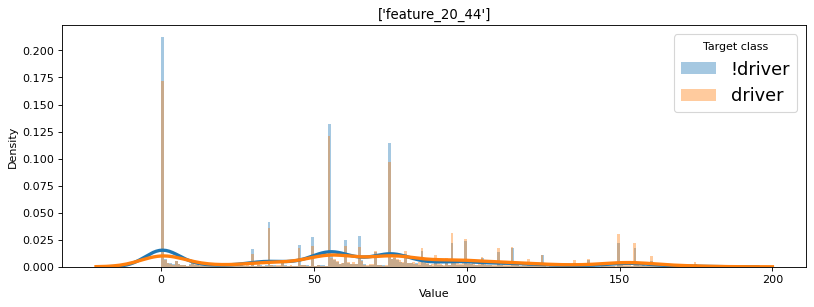

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


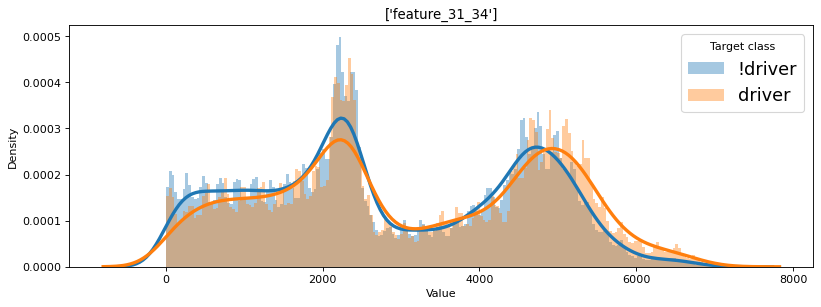

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


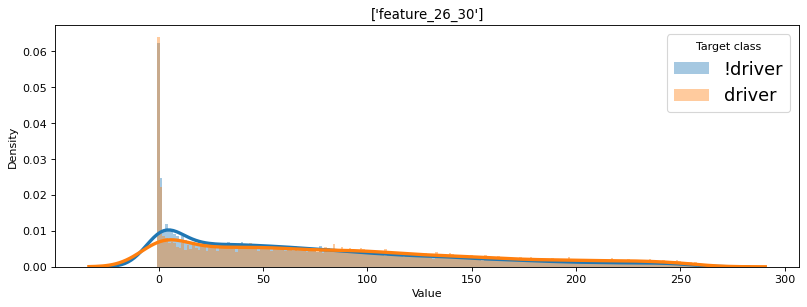

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


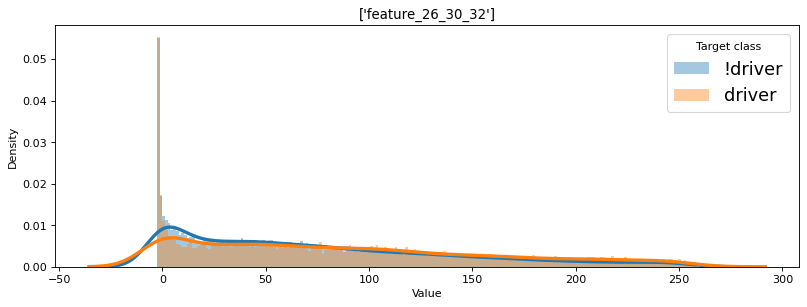

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


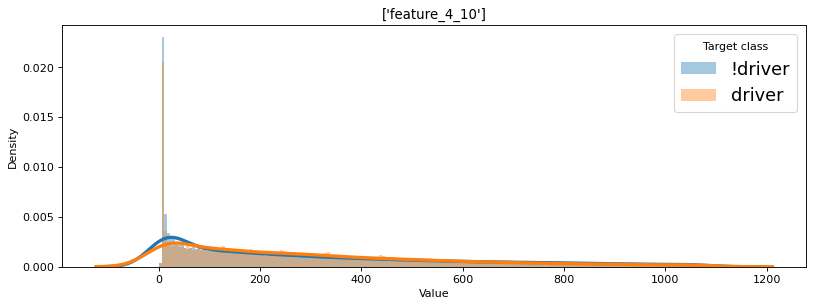

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


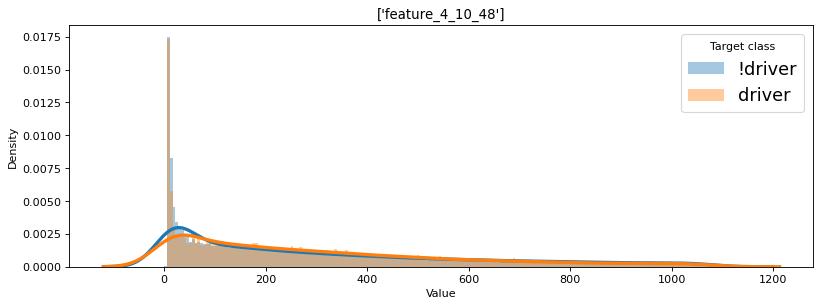

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


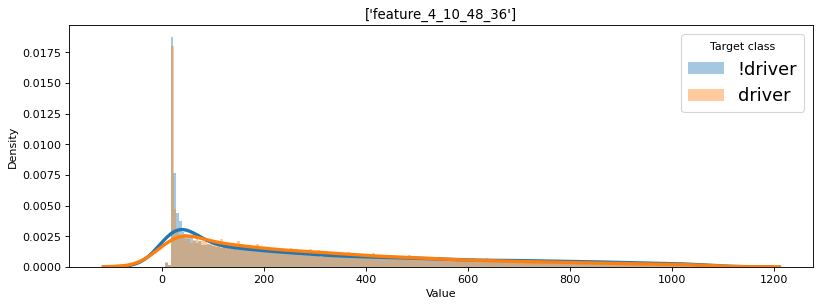

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


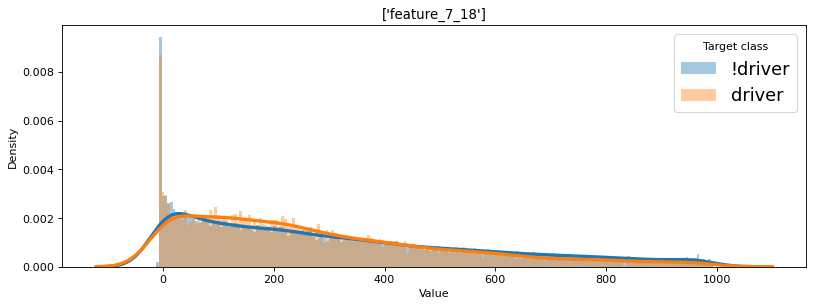

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


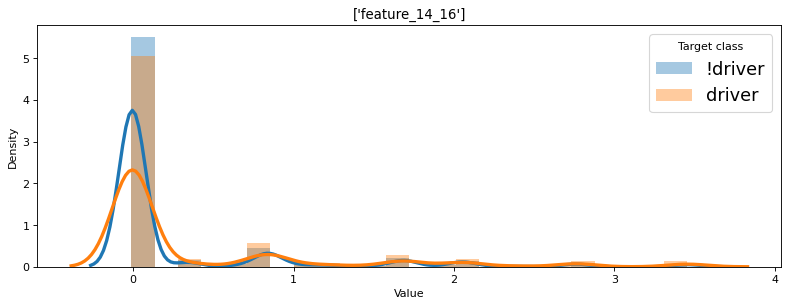

In [733]:
def classDistPlot(input_data, feature):
    plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#     ax = plt.subplot(4, 1, i + 1)
    bins_count = min(input_data[feature].nunique(), 200)
    
    sns.distplot(input_data[input_data.target == 0][feature], hist = True, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = '!driver',
                     bins = bins_count)

    sns.distplot(input_data[input_data.target == 1][feature], hist = True, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = 'driver',
                     bins = bins_count)

    plt.legend(prop={'size': 16}, title = 'Target class')
    plt.title([feature])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()    

for feature in features:
    classDistPlot(input_data, feature)


### First exploration

In [694]:
#feature_46 has more skipped values to others
features_to_explore = {'feature_6', 'feature_12', 'feature_46', 'feature_33', 'feature_45', 'feature_15', 'feature_19', 'feature_2'}
# df = input_data[features_to_explore].isna().agg(sum, axis=1)
# df[df == 0]

In [695]:
x_label = 'feature_6'
y_label = 'feature_46'

#prepare downsampled data
# data_to_plot = input_data[input_data.target == 1][{x_label, y_label, 'target'}]
#     .append(input_data[input_data.target == 0][{x_label, y_label, 'target'}])

data_to_plot = input_data[{x_label, y_label, 'target'}].dropna()
print

ratio = (data_to_plot[data_to_plot.target == 1].count()) / (data_to_plot[data_to_plot.target == 0].count())

print(data_to_plot[data_to_plot.target == 1].count())

from sklearn.model_selection import train_test_split
data_to_plot2 = data_to_plot[data_to_plot.target == 1].append(train_test_split(data_to_plot[data_to_plot.target == 0], test_size=ratio[0])[1])
data_to_plot3 = train_test_split(data_to_plot[data_to_plot.target == 0], test_size=ratio[0])[1].append(data_to_plot[data_to_plot.target == 1])

feature_6     10214
feature_46    10214
target        10214
dtype: int64


<AxesSubplot:xlabel='feature_6', ylabel='feature_46'>

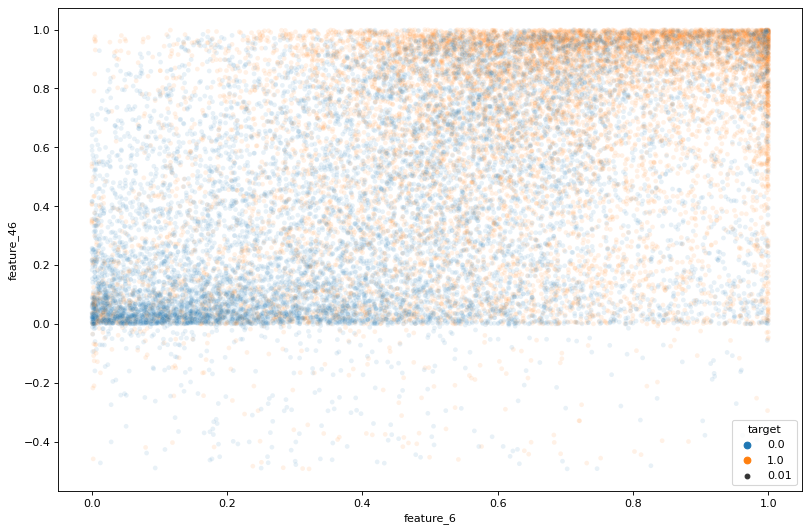

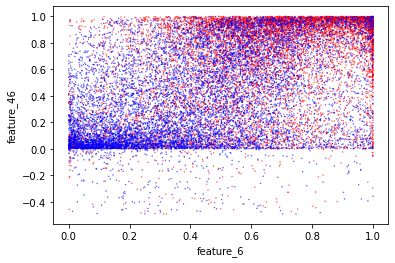

In [696]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.scatterplot(x=data_to_plot2[x_label], y=data_to_plot2[y_label], 
                hue=data_to_plot2.target,
                size=0.01, alpha=0.1)
# plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# sns.scatterplot(x=data_to_plot2[data_to_plot2.target==1][x_label], y=data_to_plot2[data_to_plot2.target==1][y_label], 
# #                 hue='red', 
#                 size=0.1, alpha=0.1)
# plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
# sns.scatterplot(x=data_to_plot2[data_to_plot2.target==0][x_label], y=data_to_plot2[data_to_plot2.target==0][y_label], 
# #                 hue='blue', 
#                 size=0.1, alpha=0.1)
data_to_plot2.plot.scatter(x=x_label, y=y_label, s=0.1, c=data_to_plot2.target.apply(lambda x: 'red' if x == 1 else 'blue'))
# data_to_plot2[data_to_plot2.target == 1].plot.scatter(x=x_label, y=y_label, s=1, c='red')
# data_to_plot2[data_to_plot2.target == 0].plot.scatter(x=x_label, y=y_label, s=1, c='blue')

<AxesSubplot:xlabel='feature_6', ylabel='feature_46'>

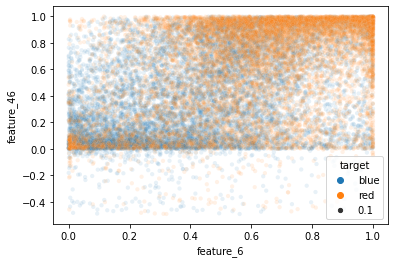

In [697]:
sns.scatterplot(x=data_to_plot3[x_label], y=data_to_plot3[y_label], 
                hue=data_to_plot3.target.apply(lambda x: 'red' if x == 1 else 'blue'), 
                size=0.1, alpha=0.1)

## Logistic regression

In [752]:
features_to_explore = {
    'feature_2',
    'feature_6', 
    'feature_7', 
    'feature_8', 
    'feature_12', 
    'feature_13', 
    'feature_15', 
    'feature_19', 
    'feature_23', 
    'feature_30', 
    'feature_32', 
    'feature_33',
    'feature_45',
    'feature_46',
    'feature_47',
    'feature_48',
    'feature_49'
}
# features_to_explore = nonCategoricalFeatures

#### Normalize data

In [759]:
logit_features = features_to_explore - {'feature_30', 'feature_23', 'feature_49', 'feature_8', 'feature_45', 'feature_15'}
print(logit_features)

xy_prepared_data = input_data[logit_features | {'target'}].dropna()
X = xy_prepared_data[logit_features]
y = xy_prepared_data.target

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
print(scaler.mean_)
print(scaler.scale_)

X_scaled = scaler.transform(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

{'feature_32', 'feature_46', 'feature_2', 'feature_33', 'feature_19', 'feature_13', 'feature_48', 'feature_6', 'feature_12', 'feature_7', 'feature_47'}
[1.04411080e+02 4.76343677e-01 2.15799564e-01 1.98446228e-01
 2.57386545e-01 3.23505440e-02 1.81505758e+02 4.80804948e-01
 2.94312661e-01 2.65538635e+02 9.09711959e+01]
[8.68352880e+01 3.54290518e-01 1.44561287e-01 1.38469409e-01
 1.01926571e-01 3.67372094e-02 1.81521513e+02 2.56762181e-01
 9.62063976e-02 2.27921911e+02 7.11782615e+01]
[-7.71582780e-17 -6.14650689e-17 -1.76548602e-16  6.86577898e-17
 -6.47344875e-16  1.30776742e-16  8.10815803e-17 -5.10029295e-17
 -4.25024413e-16 -1.55624323e-16  1.30776742e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [760]:
import statsmodels.api as sm

logit_model = sm.Logit(y,X_scaled)
result = logit_model.fit()
print(result.summary2())

#it should delete features with P>|z| > 0.05 

Optimization terminated successfully.
         Current function value: 0.636141
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.103    
Dependent Variable: target           AIC:              27672.4912
Date:               2021-05-08 00:56 BIC:              27760.3436
No. Observations:   21733            Log-Likelihood:   -13825.   
Df Model:           10               LL-Null:          -12529.   
Df Residuals:       21722            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        -0.1134     0.0308   -3.6754   0.0002   -0.1738   -0.0529
x2         0.4046     0.0174   23.2356   0.0000    0.3705 

In [761]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [762]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [763]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4524  282]
 [1270  444]]


In [764]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      4806
         1.0       0.61      0.26      0.36      1714

    accuracy                           0.76      6520
   macro avg       0.70      0.60      0.61      6520
weighted avg       0.74      0.76      0.72      6520



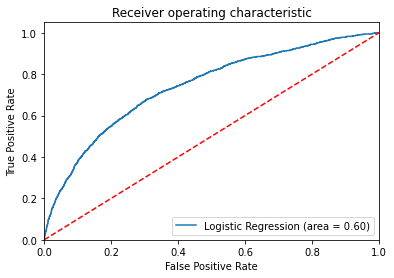

In [765]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [ ]:
#before oversampling
#[[6345  284]
#[1806  464]]
#macro avg (ROC area) 0.58

In [767]:
logreg.predict_proba(X_test)[:,1]

array([0.19559024, 0.10200131, 0.43287542, ..., 0.49286052, 0.76925175,
       0.28749682])

In [768]:
X_test

array([[-1.15633957,  0.19412644, -0.73509006, ...,  0.43522406,
        -1.1313464 , -1.03923859],
       [ 0.58258481, -1.00514414,  2.32438742, ..., -1.55260632,
         1.63446929,  1.58796804],
       [-0.29263541,  1.45128749,  2.08695179, ..., -2.05797812,
        -0.75086521,  0.15494624],
       ...,
       [ 1.48083715,  1.28554244,  1.59039423, ..., -1.08763724,
        -0.05777696,  0.54832477],
       [ 0.17952287,  1.35110274, -0.67976917, ...,  1.80916017,
        -0.39561196,  1.30698337],
       [ 0.17952287,  0.67257781,  0.67434676, ..., -0.76835494,
        -0.73520195, -0.44917079]])

In [ ]:
#replace feature_25 with dummies
#There is no NaNs 
feature_25_vals = pd.DataFrame({'feature_25':tabular_data.feature_25.unique()})
#add dummies
# feature_25_vals = feature_25_vals.reset_index().rename(columns = {'index':'feature_25_index'})
feature_25_vals = feature_25_vals.combine_first(pd.get_dummies(feature_25_vals.index, prefix='feature_25'))
#feature_25_vals

In [ ]:
#merge feature_25 dummies
cleaned_data = pd.merge(cleaned_data, feature_25_vals, how = 'left', on='feature_25')
#delete feature_25
cleaned_data = cleaned_data.drop(columns=['feature_25'], errors='ignore')
# cleaned_data